# Importing Libraries

In [1]:
%%time

import os
import csv
import math
from datetime import datetime as dt
import numpy as np
import pandas as pd
from copy import copy
from tqdm import tqdm

# Dictionaries
import json
from pprint import pprint

# Iterate in loops
import itertools
from itertools import zip_longest

# Simpsons integration
from numpy import trapz
from scipy.integrate import simps

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# To display df nicely in loops
from IPython.display import display 
# display(df1.head()) 
# display(df2.head())

# Display rows and columns Pandas
pd.options.display.max_columns = 100
pd.set_option('display.max_rows',100)

# # For displaying max rows in series
# pd.options.display.max_rows = 10

Wall time: 1.55 s


In [2]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance

# Importing data

In [3]:
# Prints the current working directory
os.getcwd()
# os.listdir()

'C:\\Users\\fahad\\MegaSync\\NMBU\\GitHub\\vPheno'

## Finding Username folder to make general path for multi PC use

In [4]:
username = str(os.getcwd()).split('\\')[2]
user_path = r'C:/Users/'+username+'/'
username, user_path

('fahad', 'C:/Users/fahad/')

## Declaring Import paths

In [5]:
main_path = r'./Data/'
path = r'./Data/3. merged data/'
export_path = './Data/4. results/'
export_path_comparability = './Data/4. results/comparability/'


# Create export_path folder if not exists already
os.makedirs(path, exist_ok=True)
os.makedirs(export_path, exist_ok=True)
os.makedirs(export_path_comparability, exist_ok=True)

os.listdir(path)

['Graminor_2019_Simps.csv',
 'Graminor_2019_Trapz.csv',
 'Graminor_2020_Simps.csv',
 'Graminor_2020_Trapz.csv',
 'Masbasis_2019_Simps.csv',
 'Masbasis_2019_Trapz.csv',
 'Masbasis_2020_Simps.csv',
 'Masbasis_2020_Trapz.csv',
 'Robot_2020_Simps.csv',
 'Robot_2020_Trapz.csv',
 'Staur_2019_Simps.csv',
 'Staur_2019_Trapz.csv',
 'Staur_2020_Simps.csv',
 'Staur_2020_Trapz.csv']

In [6]:
# Making dictionary of files in each folder, in case there are multiple types of data
dict_paths = {}
def explore(starting_path):
    for dirpath, dirnames, filenames in os.walk(starting_path):
        dict_paths[dirpath.split('/')[-2]] = filenames
#     pprint(dict_paths)
explore(path)

# Data Preparation
## Creating list of complete files

In [7]:
# Get the list of all files in directory tree at given path

files_with_address = []
files_list = []

for (dirpath, dirnames, filenames) in os.walk(path):
    files_with_address += [os.path.join(dirpath, file) for file in filenames]
    files_list.extend(filenames)
    
print(len(files_with_address), 'files found in the directory')
# files_with_address
files_list

14 files found in the directory


['Graminor_2019_Simps.csv',
 'Graminor_2019_Trapz.csv',
 'Graminor_2020_Simps.csv',
 'Graminor_2020_Trapz.csv',
 'Masbasis_2019_Simps.csv',
 'Masbasis_2019_Trapz.csv',
 'Masbasis_2020_Simps.csv',
 'Masbasis_2020_Trapz.csv',
 'Robot_2020_Simps.csv',
 'Robot_2020_Trapz.csv',
 'Staur_2019_Simps.csv',
 'Staur_2019_Trapz.csv',
 'Staur_2020_Simps.csv',
 'Staur_2020_Trapz.csv']

## Data Checking/control

### Check for duplicate filenames

In [8]:
print('Total number of files are :', len(files_list))

print('Number of unique file names are:', len(set(files_list)))

print('There is/are', len(files_list) - len(set(files_list)),'duplicate file name/names.')
if len(files_list) - len(set(files_list)) > 0:
    raise NameError

Total number of files are : 14
Number of unique file names are: 14
There is/are 0 duplicate file name/names.


# Importing data files to Pandas

In [9]:
%%time

all_df = []
for data in files_with_address:
    file_name = os.path.splitext(os.path.basename(data))[0]

    # Replce all invalid characters in the name
    file_name = file_name.replace(" ", "_")
    file_name = file_name.replace("-", "_")
    file_name = file_name.replace(")", "")
    file_name = file_name.replace("(", "")
    df_name = file_name.replace(".", "")
    # Test: Check if the same date is already present in the current dict key
    if df_name in all_df:
        print(f'A file with the same name {df_name} has already been imported. \n Please check if there is duplication of data.')
        raise NameError
    all_df.append(df_name)

    locals()[df_name] = pd.read_csv(data, index_col=False)
    print(df_name, '=====', locals()[df_name].shape)
# all_df

Graminor_2019_Simps ===== (600, 123)
Graminor_2019_Trapz ===== (600, 123)
Graminor_2020_Simps ===== (800, 123)
Graminor_2020_Trapz ===== (800, 123)
Masbasis_2019_Simps ===== (528, 124)
Masbasis_2019_Trapz ===== (528, 124)
Masbasis_2020_Simps ===== (659, 126)
Masbasis_2020_Trapz ===== (659, 126)
Robot_2020_Simps ===== (96, 125)
Robot_2020_Trapz ===== (96, 125)
Staur_2019_Simps ===== (1328, 127)
Staur_2019_Trapz ===== (1328, 127)
Staur_2020_Simps ===== (1504, 124)
Staur_2020_Trapz ===== (1504, 124)
Wall time: 417 ms


In [10]:
all_df_simps = [x for x in all_df if 'Simps' in x]
all_df_trapz = [x for x in all_df if 'Trapz' in x]
all_df_simps, all_df_trapz

(['Graminor_2019_Simps',
  'Graminor_2020_Simps',
  'Masbasis_2019_Simps',
  'Masbasis_2020_Simps',
  'Robot_2020_Simps',
  'Staur_2019_Simps',
  'Staur_2020_Simps'],
 ['Graminor_2019_Trapz',
  'Graminor_2020_Trapz',
  'Masbasis_2019_Trapz',
  'Masbasis_2020_Trapz',
  'Robot_2020_Trapz',
  'Staur_2019_Trapz',
  'Staur_2020_Trapz'])

In [11]:
print(f'Total imported {len(all_df)}')
all_df

Total imported 14


['Graminor_2019_Simps',
 'Graminor_2019_Trapz',
 'Graminor_2020_Simps',
 'Graminor_2020_Trapz',
 'Masbasis_2019_Simps',
 'Masbasis_2019_Trapz',
 'Masbasis_2020_Simps',
 'Masbasis_2020_Trapz',
 'Robot_2020_Simps',
 'Robot_2020_Trapz',
 'Staur_2019_Simps',
 'Staur_2019_Trapz',
 'Staur_2020_Simps',
 'Staur_2020_Trapz']

# Finding yield columns

## Importing Weather variables, yield columns, spectral indices, base indices columsn list

In [12]:
a_file = open(main_path+'vollebekk_weather_columns.json', "r")
output_str = a_file.read()
# The file is imported as string

# Converting it to python format
weather_cols_vollebekk = json.loads(output_str)
a_file.close()

pprint(len(weather_cols_vollebekk))

80


In [13]:
a_file = open(main_path+'staur_weather_columns.json', "r")
output_str = a_file.read()
# The file is imported as string

# Converting it to python format
weather_cols_staur = json.loads(output_str)
a_file.close()

pprint(len(weather_cols_staur))

80


In [14]:
a_file = open(main_path+"yield_columns.json", "r")
output_str = a_file.read()

# The file is imported as string
# Converting it to python format
yield_cols = json.loads(output_str)
a_file.close()
print(yield_cols)

['Entry', 'Replicates', 'Name', 'Lodging', 'GrainYield', 'iBlock', 'Line', 'Pedigree', 'Block', 'Days2Maturity', 'CodeName', 'Heading_Date', 'Days2Heading', 'Maturity_Date']


In [15]:
a_file = open(main_path+"spectral_indices_columns.json", "r")
output_str = a_file.read()

# The file is imported as string
# Converting it to python format
spectral_indices_all = json.loads(output_str)
a_file.close()
print(spectral_indices_all)

['NDVI', 'MTCI', 'DVI', 'GDVI', 'MTCI_CI', 'EXG', 'EXGR', 'RDVI', 'TDVI', 'GNDVI', 'NDRE', 'SCCI', 'EVI', 'TVI', 'VARI', 'GARI', 'GCI', 'GLI', 'NLI', 'MNLI', 'SAVI', 'GSAVI', 'OSAVI', 'GOSAVI', 'MSAVI2', 'MSR', 'GRVI', 'WDRVI', 'SR']


In [16]:
a_file = open(main_path+"base_indices_columns.json", "r")
output_str = a_file.read()

# The file is imported as string
# Converting it to python format
base_indices = json.loads(output_str)
a_file.close()
print(base_indices)

['Blue', 'Green', 'Red', 'RedEdge', 'NIR']


## Defining categories of features

In [17]:
# ToDo: Add check for duplicate columns in the df

base_indices

spectral_indices_all 

drop_indices = ['EVI', 'GLI', 'MTCI']

spectral_indices = [x for x in spectral_indices_all if x not in drop_indices]

# Staur weather columns are all also present in Vollebekk weather so they can be use as general weather features
weather_features = weather_cols_staur.copy()

environment_var = weather_features + ['Staur_Env', 'Vollebekk_Env']

yield_cols



['Entry',
 'Replicates',
 'Name',
 'Lodging',
 'GrainYield',
 'iBlock',
 'Line',
 'Pedigree',
 'Block',
 'Days2Maturity',
 'CodeName',
 'Heading_Date',
 'Days2Heading',
 'Maturity_Date']

## Checking which column is the yield column

In [18]:

# # Dict for saving the name and location of the yield column/s
# loc_yield_cols = {}
# for df in all_df:
#     loc = 0
#     for cols in locals()[df].columns.tolist():
#         for y_col in yield_cols:
#             if not cols.find(y_col):
#                 loc_yield_cols[cols+'_'+df] = loc
#                 print(f'\"{cols}\" column in {df} is the yield column\n as it contains the text \"{y_col}\". It is located at location {loc}')
#         loc += 1

#     yield_cols_found = list(loc_yield_cols.keys())
#     target_cols=yield_cols_found[0]
# loc_yield_cols

# Dropping unnecessary columns


In [19]:
# Dropping unnecessary columns

for df in all_df:
    temp_df = locals()[df].copy()
    locals()[df] = temp_df[base_indices+spectral_indices_all+environment_var+['Name','GrainYield']]
    print(df, temp_df.shape, '==>', locals()[df].shape)


Graminor_2019_Simps (600, 123) ==> (600, 118)
Graminor_2019_Trapz (600, 123) ==> (600, 118)
Graminor_2020_Simps (800, 123) ==> (800, 118)
Graminor_2020_Trapz (800, 123) ==> (800, 118)
Masbasis_2019_Simps (528, 124) ==> (528, 118)
Masbasis_2019_Trapz (528, 124) ==> (528, 118)
Masbasis_2020_Simps (659, 126) ==> (659, 118)
Masbasis_2020_Trapz (659, 126) ==> (659, 118)
Robot_2020_Simps (96, 125) ==> (96, 118)
Robot_2020_Trapz (96, 125) ==> (96, 118)
Staur_2019_Simps (1328, 127) ==> (1328, 118)
Staur_2019_Trapz (1328, 127) ==> (1328, 118)
Staur_2020_Simps (1504, 124) ==> (1504, 118)
Staur_2020_Trapz (1504, 124) ==> (1504, 118)


# Dealing with Nan values

## Dropping Missing values

In [20]:
# Dropping rows with missing value in any column

for df in all_df:
    temp_df = locals()[df].copy()
    locals()[df] = temp_df.dropna(axis=0)
    print(temp_df.shape[0] - locals()[df].shape[0], ' rows dropped in ', df)
#     print(locals()[df].shape[0])

1  rows dropped in  Graminor_2019_Simps
1  rows dropped in  Graminor_2019_Trapz
1  rows dropped in  Graminor_2020_Simps
1  rows dropped in  Graminor_2020_Trapz
6  rows dropped in  Masbasis_2019_Simps
6  rows dropped in  Masbasis_2019_Trapz
116  rows dropped in  Masbasis_2020_Simps
116  rows dropped in  Masbasis_2020_Trapz
8  rows dropped in  Robot_2020_Simps
8  rows dropped in  Robot_2020_Trapz
0  rows dropped in  Staur_2019_Simps
0  rows dropped in  Staur_2019_Trapz
568  rows dropped in  Staur_2020_Simps
568  rows dropped in  Staur_2020_Trapz


# Plot one index for different fields to check comparability

In [21]:
# for col in base_indices+spectral_indices:
# #     col='Blue'
#     fig_size=(8, 5)
#     fig, ax = plt.subplots(figsize=fig_size)
#     plots = ax

#     for df in all_df_simps:
# #         if not 'Robot' in df and  not 'Staur' in df:
# #         if 'Gram' in df and  'Masb' in df:
# #             if '2020' in df:
#         temp_df = locals()[df].copy()
#         ax.boxplot(sorted(temp_df[col].values), positions = [all_df_simps.index(df)], labels=[df.split('_')[0][:5]+'_'+df.split('_')[1]])
# #         ax.plot(sorted(temp_df[col].values), label=df.split('_')[0]+'_'+df.split('_')[1])
#     # Printing the band/index name in plot of the fiels_sample for reference
#     text = col
#     ax.text(.95, .98, text, ha='center', va='top', weight=100, color='blue', fontsize ='xx-large', transform=ax.transAxes)

#     ax.legend(loc=1)
#     plt.tight_layout()
# #     plt.savefig(export_path_comparability+col+'_box.jpg',dpi=250, bbox_inches='tight', transform=ax.transAxes)
#     plt.show()
# #     break

In [22]:
# for col in base_indices+spectral_indices:
# #     col='Blue'
#     fig_size=(8, 5)
#     fig, ax = plt.subplots(figsize=fig_size)
#     plots = ax

#     for df in all_df_simps:
# #         if not 'Robot' in df and  not 'Staur' in df:
# #         if 'Gram' in df and  'Masb' in df:
# #             if '2020' in df:
#         temp_df = locals()[df].copy()
# #         ax.boxplot(sorted(temp_df[col].values), positions = [all_df_simps.index(df)], labels=[df.split('_')[0][:5]+'_'+df.split('_')[1]])
#         ax.plot(sorted(temp_df[col].values), label=df.split('_')[0]+'_'+df.split('_')[1])
#     # Printing the band/index name in plot of the fiels_sample for reference
#     text = col
#     ax.text(.87, .6, text, ha='center', va='top', weight=100, color='blue', fontsize ='xx-large', transform=ax.transAxes)

#     ax.legend(loc=1)
#     plt.tight_layout()
# #     plt.savefig(export_path_comparability+col+'_sorted.jpg',dpi=250, bbox_inches='tight', transform=ax.transAxes)
#     plt.show()
# #     break

In [23]:
# for col in base_indices+spectral_indices:
# #     col='Blue'
#     fig_size=(8, 5)
#     fig, ax = plt.subplots(figsize=fig_size)
#     plots = ax

#     for df in all_df_simps:
# #         if not 'Robot' in df and  not 'Staur' in df:
# #         if 'Gram' in df and  'Masb' in df:
# #             if '2020' in df:
#         temp_df = locals()[df].copy()
# #         ax.boxplot(sorted(temp_df[col].values), positions = [all_df_simps.index(df)], labels=[df.split('_')[0][:5]+'_'+df.split('_')[1]])
#         ax.plot((temp_df[col].values), label=df.split('_')[0]+'_'+df.split('_')[1])
#     # Printing the band/index name in plot of the fiels_sample for reference
#     text = col
#     ax.text(.87, .6, text, ha='center', va='top', weight=100, color='blue', fontsize ='xx-large', transform=ax.transAxes)

#     ax.legend(loc=1)
#     plt.tight_layout()
# #     plt.savefig(export_path_comparability+col+'_random.jpg',dpi=250, bbox_inches='tight', transform=ax.transAxes)
#     plt.show()
# #     break

# Normalizing the data using Z-Score from scipy

In [24]:
from scipy.stats import zscore

for df in all_df:
    temp_df = locals()[df].copy()
    for col in temp_df.columns:
        # Checking if the column is not a yield column
        if col not in yield_cols+environment_var:
            temp_df[col] = zscore(temp_df[col])
    locals()[df] = temp_df.copy()
    print(df)

Graminor_2019_Simps
Graminor_2019_Trapz
Graminor_2020_Simps
Graminor_2020_Trapz
Masbasis_2019_Simps
Masbasis_2019_Trapz
Masbasis_2020_Simps
Masbasis_2020_Trapz
Robot_2020_Simps
Robot_2020_Trapz
Staur_2019_Simps
Staur_2019_Trapz
Staur_2020_Simps
Staur_2020_Trapz


# Checking comparability after normalization

In [25]:
# for col in base_indices+spectral_indices:
# #     col='Blue'
#     fig_size=(8, 5)
#     fig, ax = plt.subplots(figsize=fig_size)
#     plots = ax

#     for df in all_df_simps:
# #         if not 'Robot' in df and  not 'Staur' in df:
# #         if 'Gram' in df and  'Masb' in df:
# #             if '2020' in df:
#         temp_df = locals()[df].copy()
# #         ax.boxplot(sorted(temp_df[col].values), positions = [all_df_simps.index(df)], labels=[df.split('_')[0][:5]+'_'+df.split('_')[1]])
#         ax.plot(sorted(temp_df[col].values), label=df.split('_')[0]+'_'+df.split('_')[1])
#     # Printing the band/index name in plot of the fiels_sample for reference
#     text = col
#     ax.text(.87, .6, text, ha='center', va='top', weight=100, color='blue', fontsize ='xx-large', transform=ax.transAxes)

#     ax.legend(loc=1)
#     plt.tight_layout()
# #     plt.savefig(export_path_comparability+col+'_box.jpg',dpi=250, bbox_inches='tight', transform=ax.transAxes)
#     plt.show()
# #     break

# Correlation

## Scatter Plot

In [26]:
# for df in all_df_simps:
#     temp_df = locals()[df][base_indices+spectral_indices+['GrainYield']].copy()
#     data = temp_df.copy()
#     for col in base_indices:
#         print(df)
#         df_a = temp_df[col]
#         df_b = temp_df['GrainYield']


#         fig, ax = plt.subplots(1, figsize=(12,8))
#         sns.kdeplot(df_a, y=df_b, cmap='Blues',
#                    shade=True, thresh=0.05, clip=(-1,300))
#         plt.scatter(df_a, df_b, color='orangered')
#         plt.show()

## Heat Map

In [27]:
# for df in all_df_simps:
#     print(df)
#     temp_df = locals()[df][['GrainYield']+spectral_indices].copy()
# #     temp_df = locals()[df][spectral_indices+['GrainYield']].copy()
#     data = temp_df
#     columns = temp_df.columns
#     corr = data.corr()
#     fig_size=(15,8)

#     fig, ax = plt.subplots(figsize=fig_size)
    
#     mask = np.triu(np.ones_like(corr, dtype=np.bool))

    
#     ax = sns.heatmap(
#         corr, mask=mask,
#         vmin=-1, vmax=1, center=0,
#         cmap=sns.diverging_palette(20, 220, n=200),
#         square=True
#     )    
    
#     ax.set_xticklabels(
#         ax.get_xticklabels(),
#         rotation=45,
#         horizontalalignment='right'
#     );
#     plt.show()

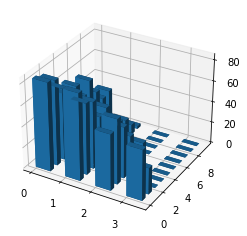

In [28]:
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

matrix = np.array([
    [84., 80.76923077, 68.05555556, 56.57894737, 60.,
     44.7761194, 55.2238806, 39.0625, 27.41935484, 29.8245614],
    [82.44274809, 67.70833333, 63.75, 44.44444444, 47.76119403,
     33.33333333, 22.78481013, 19.23076923, 9.21052632, 2.63157895],
    [53.33333333, 61.76470588, 48.64864865, 34.61538462, 0.,
     16.66666667, 0., 0., 0., 0.],
    [48., 25., 0., 0., 0., 0., 0., 0., 0., 0. ]])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xpos = [range(matrix.shape[0])]
ypos = [range(matrix.shape[1])]
xpos, ypos = np.meshgrid(xpos, ypos)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = matrix.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz,  zsort='average')

plt.show()

# Preprocessing 

## Declaring functions

### Save Results

In [45]:
from datetime import datetime as dt


def save_results(model, agg_method, train_field, test_field,
                 training_features, importances, RMSE_test,
                 RMSE_train, R2_test, R2_train, GKF_CV):

    date_time = dt.now()
    train_feat = []
    if set(spectral_indices_all) <= set(training_features):
        train_feat.append('spectral_indices_all')
    elif set(spectral_indices) <= set(training_features):
        train_feat.append('spectral_indices_select')
    if set(weather_features) <= set(training_features):
        train_feat.append('weather_features')
    if set(base_indices) <= set(training_features):
        train_feat.append('base_indices')
    if set(['Staur_Env', 'Vollebekk_Env']) <= set(training_features):
        train_feat.append('Environment_feature')
        
    results = {'Model': model,
               'Aggregation_method': agg_method,
               'Train_field': train_field,
               'Test_field': test_field,
               'Training_features': train_feat,
               'Feature_Importances': importances,
               'RMSE_test': RMSE_test,
               'RMSE_train': RMSE_train,
               'R2_test': R2_test,
               'R2_train': R2_train,
               'GKF_CV': GKF_CV,
               'DataTime': date_time}

    filename = export_path + 'results_org.csv'

    with open(filename, "a+") as csvfile:
        headers = results.keys()
        writer = csv.DictWriter(csvfile, delimiter=',',
                                lineterminator='\n', fieldnames=headers)

        # Check is the file is empty or not
        fileEmpty = os.stat(filename).st_size == 0
        # If empty, then add header
        if fileEmpty:
            writer.writeheader()  # file doesn't exist yet, write a header

        # Write the current data as next row
        writer.writerow(results)
    del(results, date_time)

### list_test_train_df

In [30]:
def list_test_train_df(all_df_, train_field, test_field, year):
    
    # year = '2019', '2020', 'all' str
#     train_field = 'Vollebekk' , 'Staur'
#     test_field = 'Vollebekk' , 'Staur'

    # Asserting if the user has given the right inputs
    assert train_field != test_field
    assert train_field == 'Vollebekk' or train_field == 'Staur'
    assert test_field == 'Vollebekk' or test_field == 'Staur'
    assert year == '2019' or year == '2020' or year == 'all'

    # Filtering based on year
    all_df_temp1 = [x for x in all_df_ if not 'Robot' in x]
    if not year == 'all':
        all_df_temp = [x for x in all_df_temp1 if year in x]
    else:
        all_df_temp = all_df_temp1.copy()
        
    # Making list of training dfs for conct before training
    staur_df_list = []
    staur_list = []
    for x in all_df_temp:
        if 'Staur' in x:
            staur_list.append(x)
#             staur_df_list.append(locals()[x])

    # Making list of test dfs for conct before training
    vollebekk_df_list = []
    vollebekk_list = []
    for x in all_df_temp:
        if not 'Staur' in x and not 'Robot' in x:
            vollebekk_list.append(x)
#             vollebekk_df_list.append(locals()[x])
    
    train_df_list = []
    train_str_list = []
    test_df_list = []
    test_str_list = []
    # Assigning test and train sets based on given inputs
    if train_field == 'Staur':
#         train_df_list = staur_df_list.copy()
        train_str_list = staur_list.copy()
        print('Training data:', staur_list)
        
#         test_df_list = vollebekk_df_list.copy()
        test_str_list = vollebekk_list.copy()
        print('Test data:', vollebekk_list)
    elif train_field == 'Vollebekk':
#         train_df_list = vollebekk_df_list.copy()
        train_str_list = vollebekk_list.copy()
        print('Training data:', vollebekk_list)
        
#         test_df_list = staur_df_list.copy()
        test_str_list = staur_list.copy()
        print('Test data:', staur_list)
    else:
        raise NameError
    
    return (train_str_list, test_str_list)
    del (all_df_temp1, all_df_temp, staur_df_list, staur_list, vollebekk_df_list, vollebekk_list, train_df_list, train_str_list, test_df_list, test_str_list)

### data_prep_field

In [31]:
# data_prep_field(all_df_, train_field = ['Staur', 'Masbasis'], test_field = ['Staur', 'Masbasis'], 
#                 year_train = ['2019', 2020], year_test = ['2019', 2020]):

def data_prep_field(all_df_, train_field, test_field, year):
    
    # year = '2019', '2020', 'all' str
#     train_field = 'Vollebekk' , 'Staur'
#     test_field = 'Vollebekk' , 'Staur'

    # Asserting if the user has given the right inputs
    assert train_field != test_field
    assert train_field == 'Vollebekk' or train_field == 'Staur'
    assert test_field == 'Vollebekk' or test_field == 'Staur'
    assert year == '2019' or year == '2020' or year == 'all'

    # Filtering based on year
    all_df_temp1 = [x for x in all_df_ if not 'Robot' in x]
    if not year == 'all':
        all_df_temp = [x for x in all_df_temp1 if year in x]
    else:
        all_df_temp = all_df_temp1.copy()
        
    # Making list of training dfs for conct before training
    staur_df_list = []
    staur_list = []
    print(all_df_temp)
    for x in all_df_temp:
        if 'Staur' in x:
            staur_list.append(x)
            print(staur_list)
#             staur_df_list.append(locals()[x])

    # Making list of test dfs for conct before training
    vollebekk_df_list = []
    vollebekk_list = []
    for x in all_df_temp:
        if not 'Staur' in x and not 'Robot' in x:
            vollebekk_list.append(x)
#             vollebekk_df_list.append(locals()[x])
    
    # Assigning test and train sets based on given inputs
    if train_field == 'Staur':
        train_df_list = staur_df_list.copy()
        print('Training data:', staur_list)
        
        test_df_list = vollebekk_df_list.copy()
        print('Test data:', vollebekk_list)
    elif train_field == 'Vollebekk':
        train_df_list = vollebekk_df_list.copy()
        print('Training data:', vollebekk_list)
        
        test_df_list = staur_df_list.copy()
        print('Test data:', staur_list)
    else:
        raise NameError
        
    train_df = pd.concat(train_df_list)
    test_df = pd.concat(test_df_list)

    X_train = train_df[training_features]
    y_train = train_df[target_features].values.ravel()
    X_test = test_df[training_features]
    y_test = test_df[target_features].values.ravel()
    
    return X_train, y_train, X_test, y_test

### training_gkf_std

In [32]:
def training_gkf_std(model, X, y, gkf):
    
    current_model = make_pipeline(StandardScaler(), model)

    scores = cross_validate(current_model, X, y, cv=gkf,
                            scoring=('r2', 'neg_root_mean_squared_error'),
                            return_train_score=True)
    RMSE_test = "%0.2f (+/- %0.2f)" % (-1*scores['test_neg_root_mean_squared_error'].mean(), 
                                  -1*scores['test_neg_root_mean_squared_error'].std() * 2)
    RMSE_train = "%0.2f (+/- %0.2f)" % (-1*scores['train_neg_root_mean_squared_error'].mean(), 
                                  -1*scores['train_neg_root_mean_squared_error'].std() * 2)


    R2_test = "%0.2f (+/- %0.2f)" % (scores['test_r2'].mean(), 
                                  scores['test_r2'].std() * 2)
    R2_train = "%0.2f (+/- %0.2f)" % (scores['train_r2'].mean(), 
                                  scores['train_r2'].std() * 2)

    print(' RMSE Test:', RMSE_test, '       R2 Test:', R2_test)
    print('RMSE Train:', RMSE_train, '      R2 Train:', R2_train)
    
    # Feature importance
    current_model.fit(X, y)
    success = False
    while not success:
        try:
            feature_importance = current_model.steps[1][1].feature_importances_
            success = True
        except:
            feature_importance = None
            pass
    # Saving results
    GKF_CV = gkf
    return feature_importance, RMSE_test, RMSE_train, R2_test, R2_train, GKF_CV
    del(current_model, scores, feature_importance, success, RMSE_test, RMSE_train, R2_test, R2_train, GKF_CV)

### training_regr

In [33]:
def training_regr(model, X_train, y_train, X_test, y_test):
    current_model = make_pipeline(StandardScaler(), model)

    current_model.fit(X_train, y_train)
    y_pred_train = current_model.predict(X_train)
    y_pred = current_model.predict(X_test)
    
    RMSE_test = mean_squared_error(y_test, y_pred, squared=False)
    RMSE_train = mean_squared_error(y_train, y_pred_train, squared=False)


    R2_test = r2_score(y_test, y_pred)
    R2_train = r2_score(y_train, y_pred_train)
    
    print(' RMSE Test:', RMSE_test, '       R2 Test:', R2_test)
    print('RMSE Train:', RMSE_train, '      R2 Train:', R2_train)

    # Feature importance
    success = False
    while not success:
        try:
            feature_importance = current_model.steps[1][1].feature_importances_
            success = True
        except:
            feature_importance = None
            pass

    GKF_CV = False
    
    return feature_importance, RMSE_test, RMSE_train, R2_test, R2_train, GKF_CV
    del(current_model, y_pred_train, y_pred, feature_importance, success, RMSE_test, RMSE_train, R2_test, R2_train, GKF_CV)

### Plot Feature Importance

In [34]:
# from matplotlib.backends.backend_pdf import PdfPages

# # Create plots folder if not exists already
# os.makedirs(plots_export_path, exist_ok=True)

# pdf = PdfPages(plots_export_path+'feat_imp.pdf')

def plot_feat_imp(feature_importance, model, train_feat, threshold='all', sort_feat=True):
    # threshold =  percentage of max(features_importance) or 'all' or top_x number of features
    # Plotting feature importance
    # Create arrays from feature importance and feature names

    feature_names = train_feat.copy()
    model_name =  str(model).split('(')[0]
    
    # Default threshold is 0, i.e. use all features
    thres = 0

    # Selecting features based on given threshold
    if isinstance(threshold, int) or isinstance(threshold, float):
        thres = threshold * 0.01
    elif str.lower(threshold) == 'all':
        thres = 0

    importances, names = zip(*(
        (x, y) for x, y in zip(feature_importance, feature_names) if x >= thres*max(feature_importance)))
    
    # Finding and filtering top_x number of features
    if isinstance(threshold, str):
        if str.lower(threshold.split('_')[0]) == 'top':
            top_x_feat = int(threshold.split('_')[1])
            sort_imp, sorted_name = zip(*sorted(zip(feature_importance, feature_names), reverse=True))

            importances, names = zip(*(
                (x, y) for x, y in zip(feature_importance, feature_names) if y in sorted_name[:top_x_feat]))  
    
    # Sorting faeture importances if required
    if sort_feat:
        importances, names = zip(*sorted(zip(importances, names), reverse=True))

    # Create a DataFrame using a Dictionary
    data={'feature_names':names,'feature_importance':importances}
    feat_imp_df = pd.DataFrame(data)

    # Sort the DataFrame in order decreasing feature importance
#     feat_imp_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,5))
    #Plot Searborn bar chart
    sns.barplot(y=feat_imp_df['feature_importance'], x=feat_imp_df['feature_names'], palette = 'winter'  )
    #Add chart labels

    plt.title(model_name + ' Feature Importance')
    plt.xticks(rotation=60)
    plt.xlabel('Feature Names')
    plt.ylabel('Feature Importance')
    export_plots = export_path+'/Feature_Importance/'
    os.makedirs(export_plots, exist_ok=True)
#     plt.savefig(export_plots+'feature_importance'+model_name+'.jpg',dpi=150, bbox_inches='tight')
#     plt.savefig(export_plots+col+feature_importance_'+model_name+'.pdf',dpi=500, bbox_inches='tight')

    plt.show()
    
    

## CPU Info

In [35]:
# Number of cores in the system being used
import multiprocessing
multiprocessing.cpu_count()

import psutil
psutil.cpu_count()

import cpuinfo
info = cpuinfo.get_cpu_info()
print('python_version:', info['python_version'])
print(info['arch'])
print(info['bits'])
print(info['count'])
print(info['arch_string_raw'])
print(info['vendor_id_raw'])
print(info['brand_raw'])
print(info['hz_advertised_friendly'])




python_version: 3.8.5.final.0 (64 bit)
X86_64
64
8
AMD64
GenuineIntel
Intel(R) Core(TM) i7-8565U CPU @ 1.80GHz
1.8000 GHz


# ML Models

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GroupKFold

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import time
from datetime import datetime as dt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
# import xgboost as xgb
from sklearn.linear_model import Lasso
# from catboost import CatBoostRegressor


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


## List of models

In [37]:
models = [
#          CatBoostRegressor(depth=8),
         RandomForestRegressor(random_state=1, n_jobs = -1)]
from sklearn.linear_model import LassoCV
# models = [Lasso()]

### Deep Learning Model

## Fine Tuning the models using all data

## Variations of data processing

In [38]:
threshold_all = 'top_25'
sorted_all = True
agg_method = 'Simpsons'
# agg_method = 'Trapezoid'

In [41]:
# training_features = base_indices + spectral_indices + environment_var
# training_features = base_indices + spectral_indices + weather_features
training_features =  spectral_indices + weather_features
# training_features = spectral_indices

target_features = ['GrainYield']

group_feature = ['Name']

if agg_method == 'Simpsons':
    all_df_now = all_df_simps.copy()
elif agg_method == 'Trapezoid': 
    all_df_now = all_df_trapz.copy()

## Variations in Datasets

### All data mixed

In [71]:
temp_list = [x for x in all_df_now if not 'Robot' in x]

# Making list of df for conct before training
# This is different form list of srtings, as this is a list of actual dataframes
df_list = []
for x in temp_list:
    df_list.append(locals()[x])

df_ = pd.concat(df_list)

X = df_[training_features]
y = df_[target_features].values.ravel()
groups = df_[group_feature].values.ravel()

gkf = list(GroupKFold(n_splits=6).split(X, y, groups))
FIXING GROUPS IN GKF
#     Getting scores using cross_val_score
for model in models:
    importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp = training_gkf_std(
        model, X, y, gkf)
    plot_feat_imp(importances,
                  model,
                  training_features,
                  threshold=threshold_all)

    save_results(model=model,
                 agg_method=agg_method,
                 train_field='all_mix',
                 test_field='all_mix',
                 training_features=training_features,
                 importances=importances,
                 RMSE_test=RMSE_test_temp,
                 RMSE_train=RMSE_train_temp,
                 R2_test=R2_test_temp,
                 R2_train=R2_train_temp,
                 GKF_CV=GKF_CV_temp)
del (temp_list, df_list, df_, X, y, groups, gkf)
del (importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, model)

SyntaxError: invalid syntax (<ipython-input-71-161f4d201764>, line 16)

### Within same datasets:

Graminor_2019_Trapz
Graminor_2019_Trapz
Graminor_2019_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 40.86 (+/- -1.81)        R2 Test: 0.34 (+/- 0.02)
RMSE Train: 15.08 (+/- -0.36)       R2 Train: 0.91 (+/- 0.01)


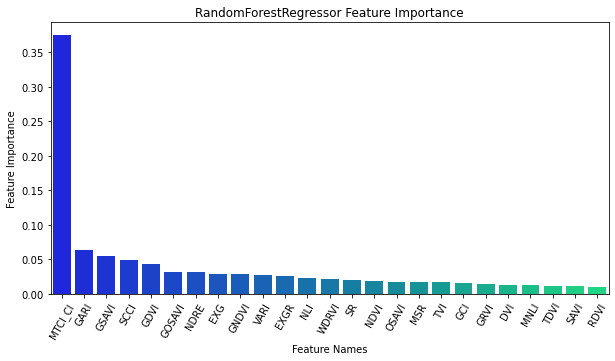

Graminor_2020_Trapz
Graminor_2020_Trapz
Graminor_2020_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 45.50 (+/- -5.30)        R2 Test: 0.79 (+/- 0.01)
RMSE Train: 17.05 (+/- -1.11)       R2 Train: 0.97 (+/- 0.00)


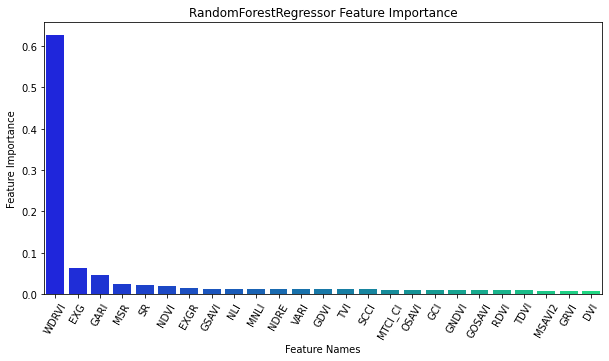

Masbasis_2019_Trapz
Masbasis_2019_Trapz
Masbasis_2019_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 52.91 (+/- -7.28)        R2 Test: 0.60 (+/- 0.15)
RMSE Train: 19.46 (+/- -1.60)       R2 Train: 0.95 (+/- 0.01)


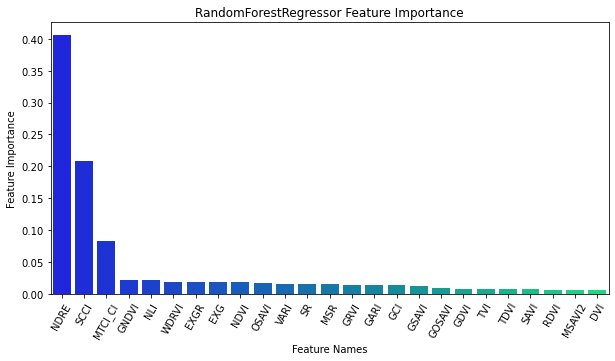

Masbasis_2020_Trapz
Masbasis_2020_Trapz
Masbasis_2020_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 68.35 (+/- -12.29)        R2 Test: 0.49 (+/- 0.09)
RMSE Train: 25.24 (+/- -1.54)       R2 Train: 0.93 (+/- 0.01)


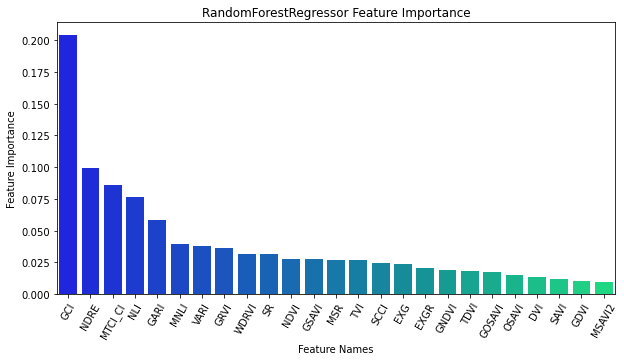

Robot_2020_Trapz
Robot_2020_Trapz


KeyboardInterrupt: 

In [59]:
# Iterating through all possible permutations of the fields dataset
for df in all_df_now:
    df_ = locals()[df].copy()

    X = df_[training_features]
    y = df_[target_features].values.ravel()
    groups = df_[group_feature].values.ravel()

    gkf = list(GroupKFold(n_splits=3).split(X, y, groups))
    print(df)
    #     Getting scores using cross_val_score
    for model in models:
        print(df)
        importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp = training_gkf_std(
            model, X, y, gkf)
        plot_feat_imp(importances,
                      model,
                      training_features,
                      threshold=threshold_all)

        save_results(model=model,
                     agg_method=agg_method,
                     train_field=df,
                     test_field=df,
                     training_features=training_features,
                     importances=importances,
                     RMSE_test=RMSE_test_temp,
                     RMSE_train=RMSE_train_temp,
                     R2_test=R2_test_temp,
                     R2_train=R2_train_temp,
                     GKF_CV=GKF_CV_temp)
    del (df, df_, X, y, groups, gkf)
    del (importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, model)

### One against all - one2one

Training:  Graminor_2019_Trapz Test:  Graminor_2020_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 132.57366516281775        R2 Test: -0.7670320200779301
RMSE Train: 15.139833679301852       R2 Train: 0.9094971276521597


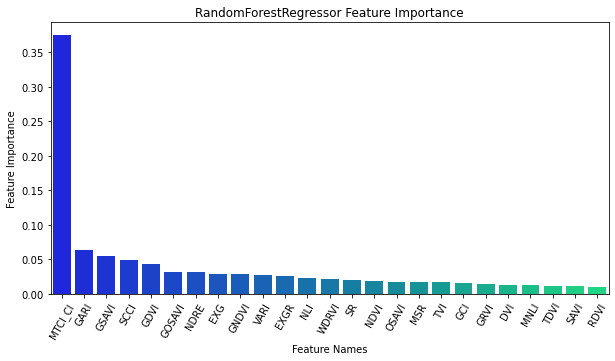

Training:  Graminor_2019_Trapz Test:  Masbasis_2019_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 67.43063738992886        R2 Test: 0.3604899624956558
RMSE Train: 15.13983367930185       R2 Train: 0.9094971276521597


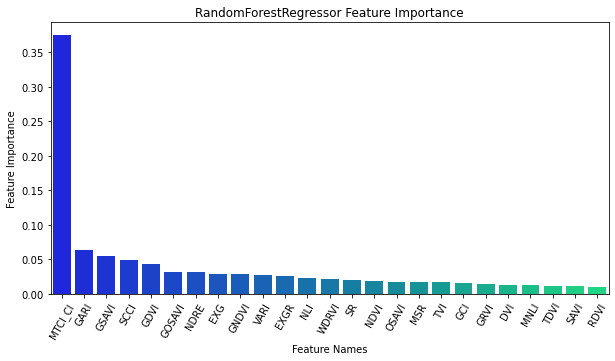

Training:  Graminor_2019_Trapz Test:  Masbasis_2020_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 105.66285791585227        R2 Test: -0.2219867080068212
RMSE Train: 15.13983367930185       R2 Train: 0.9094971276521598


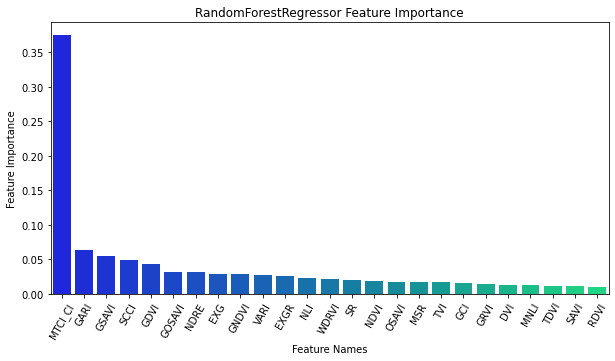

Training:  Graminor_2019_Trapz Test:  Robot_2020_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 89.82320268101975        R2 Test: 0.18518846721663962
RMSE Train: 15.13983367930185       R2 Train: 0.9094971276521597


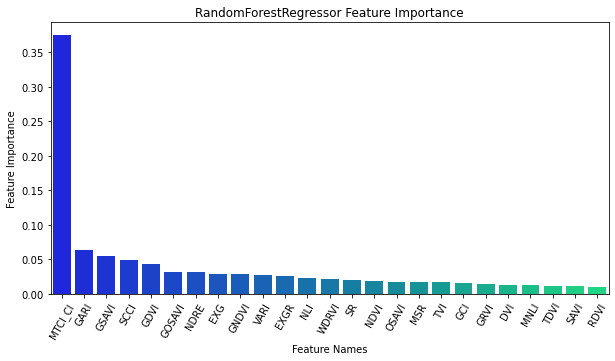

Training:  Graminor_2019_Trapz Test:  Staur_2019_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 122.29925692489645        R2 Test: -0.6581803560157076
RMSE Train: 15.139833679301852       R2 Train: 0.9094971276521597


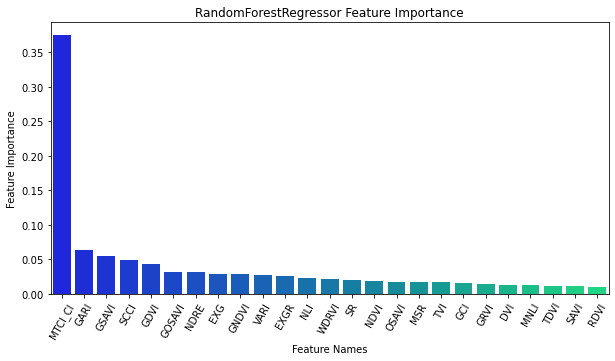

Training:  Graminor_2019_Trapz Test:  Staur_2020_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 90.70600141977        R2 Test: -0.059000140084694896
RMSE Train: 15.13983367930185       R2 Train: 0.9094971276521598


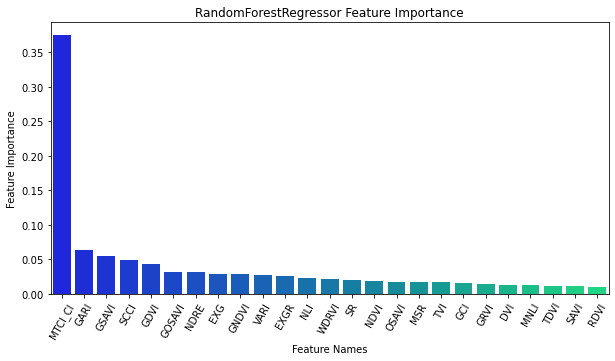

Training:  Graminor_2020_Trapz Test:  Graminor_2019_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 111.98094601028296        R2 Test: -3.951176617456195
RMSE Train: 16.514111514066105       R2 Train: 0.9725817129380752


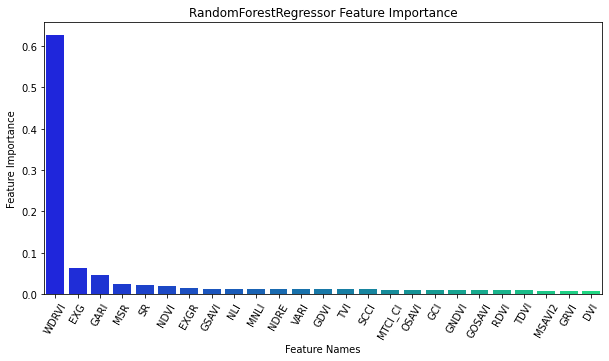

Training:  Graminor_2020_Trapz Test:  Masbasis_2019_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 107.04339875594638        R2 Test: -0.611582770420255
RMSE Train: 16.514111514066105       R2 Train: 0.9725817129380752


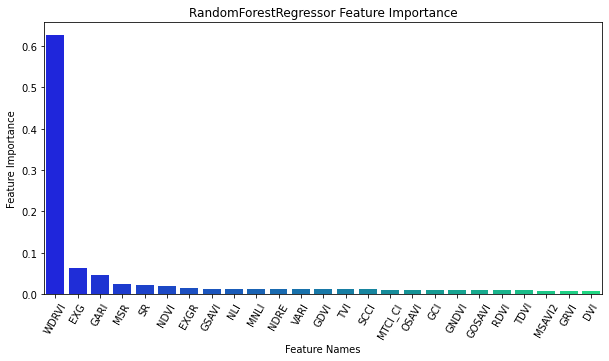

Training:  Graminor_2020_Trapz Test:  Masbasis_2020_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 92.81043822716342        R2 Test: 0.057209012283092386
RMSE Train: 16.51411151406611       R2 Train: 0.9725817129380752


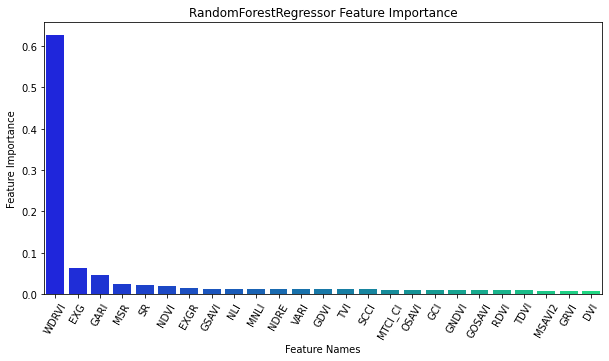

Training:  Graminor_2020_Trapz Test:  Robot_2020_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 153.66409783387587        R2 Test: -1.3846514869068134
RMSE Train: 16.5141115140661       R2 Train: 0.9725817129380752


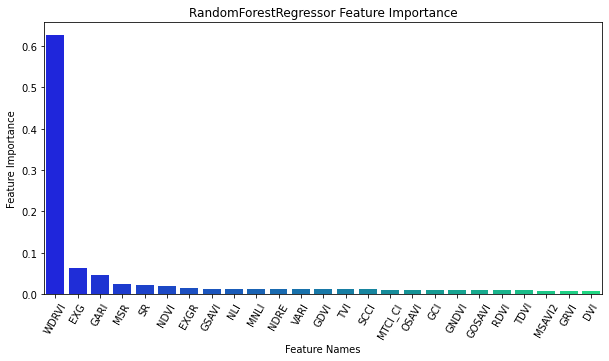

Training:  Graminor_2020_Trapz Test:  Staur_2019_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 182.27932635147488        R2 Test: -2.68348545265129
RMSE Train: 16.514111514066105       R2 Train: 0.9725817129380752


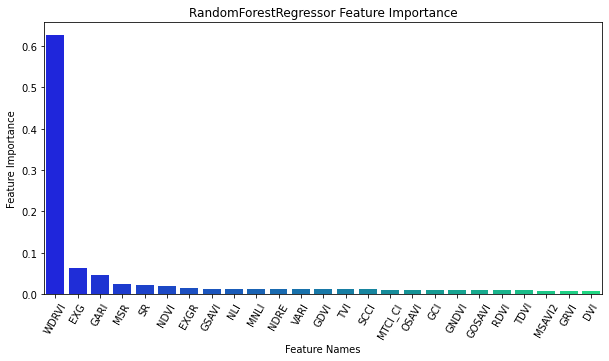

Training:  Graminor_2020_Trapz Test:  Staur_2020_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 86.4239793105226        R2 Test: 0.03862573807371139
RMSE Train: 16.5141115140661       R2 Train: 0.9725817129380752


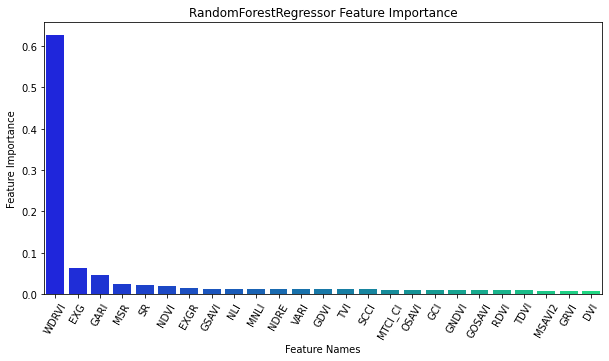

Training:  Masbasis_2019_Trapz Test:  Graminor_2019_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 62.10736581116515        R2 Test: -0.5230226914872318
RMSE Train: 19.018495839397755       R2 Train: 0.9491272555371257


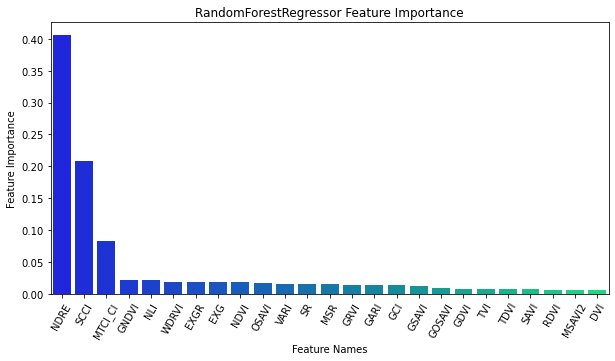

Training:  Masbasis_2019_Trapz Test:  Graminor_2020_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 143.057355491521        R2 Test: -1.0575494347027399
RMSE Train: 19.01849583939775       R2 Train: 0.9491272555371257


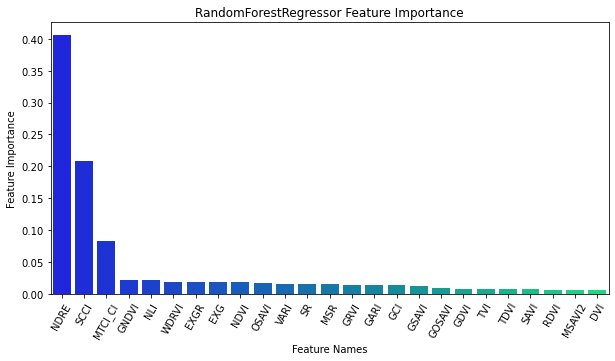

Training:  Masbasis_2019_Trapz Test:  Masbasis_2020_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 108.04103073845606        R2 Test: -0.27761267994720673
RMSE Train: 19.018495839397755       R2 Train: 0.9491272555371257


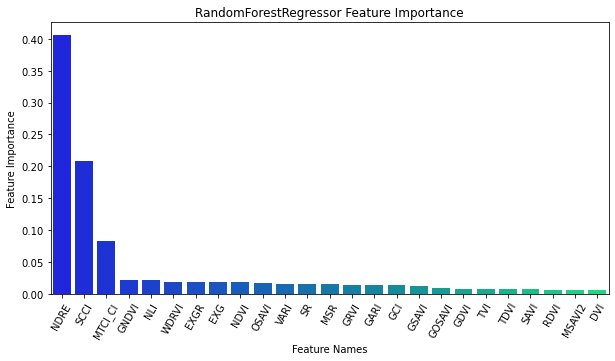

Training:  Masbasis_2019_Trapz Test:  Robot_2020_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 76.17807176541942        R2 Test: 0.4139427451312866
RMSE Train: 19.01849583939775       R2 Train: 0.9491272555371257


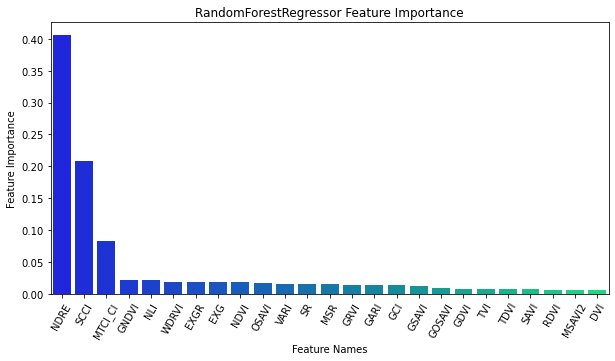

Training:  Masbasis_2019_Trapz Test:  Staur_2019_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 117.3888077439504        R2 Test: -0.5276980093153318
RMSE Train: 19.018495839397755       R2 Train: 0.9491272555371257


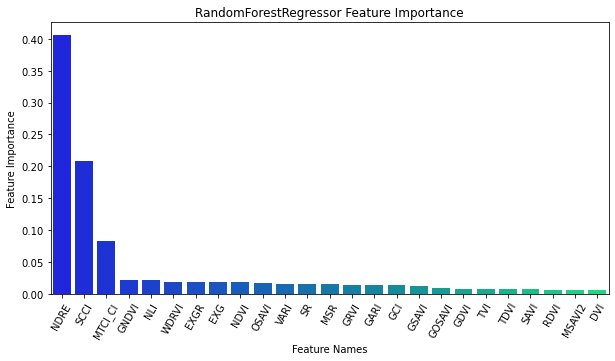

Training:  Masbasis_2019_Trapz Test:  Staur_2020_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 67.88624422564362        R2 Test: 0.40681858301557994
RMSE Train: 19.018495839397755       R2 Train: 0.9491272555371257


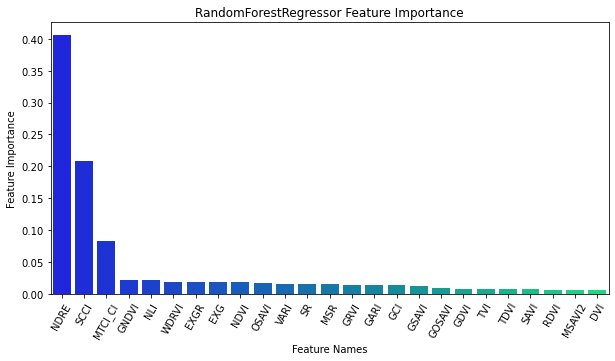

Training:  Masbasis_2020_Trapz Test:  Graminor_2019_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 92.66840081309238        R2 Test: -2.390654132840453
RMSE Train: 24.915000126965772       R2 Train: 0.9320571808285879


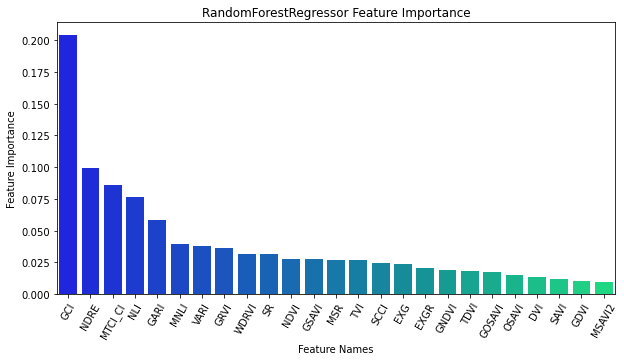

Training:  Masbasis_2020_Trapz Test:  Graminor_2020_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 87.52562374276769        R2 Test: 0.22980566125234614
RMSE Train: 24.91500012696577       R2 Train: 0.932057180828588


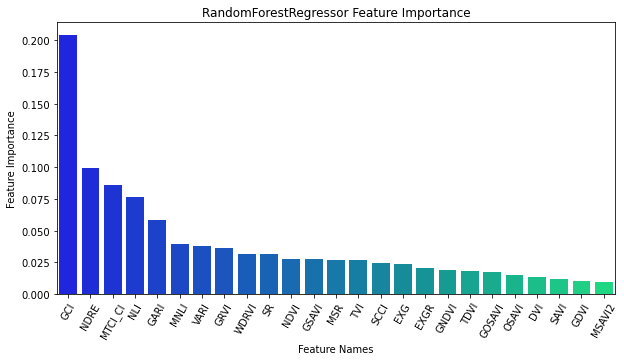

Training:  Masbasis_2020_Trapz Test:  Masbasis_2019_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 91.4501692173267        R2 Test: -0.1762560290665134
RMSE Train: 24.91500012696577       R2 Train: 0.932057180828588


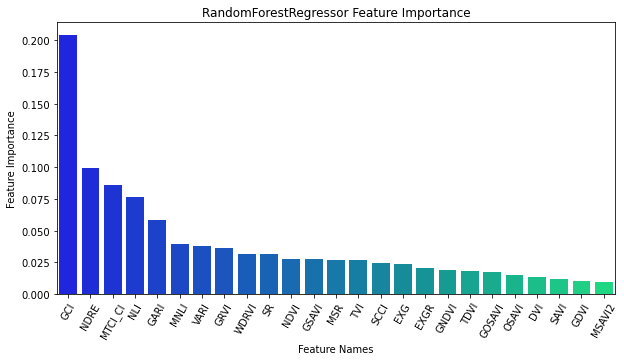

Training:  Masbasis_2020_Trapz Test:  Robot_2020_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 132.483486749318        R2 Test: -0.7725708151208293
RMSE Train: 24.915000126965765       R2 Train: 0.932057180828588


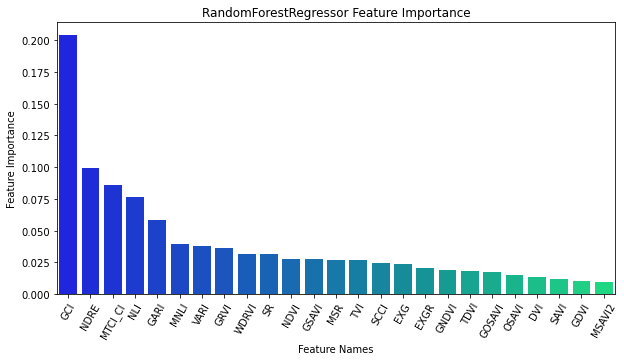

Training:  Masbasis_2020_Trapz Test:  Staur_2019_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 177.66404565478166        R2 Test: -2.499316495207627
RMSE Train: 24.91500012696577       R2 Train: 0.932057180828588


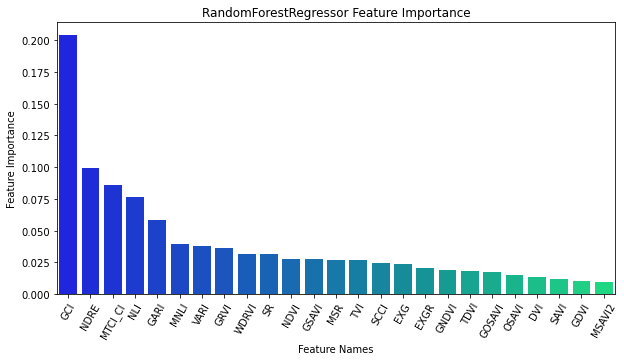

Training:  Masbasis_2020_Trapz Test:  Staur_2020_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 71.91334820448478        R2 Test: 0.3343545133071819
RMSE Train: 24.91500012696577       R2 Train: 0.932057180828588


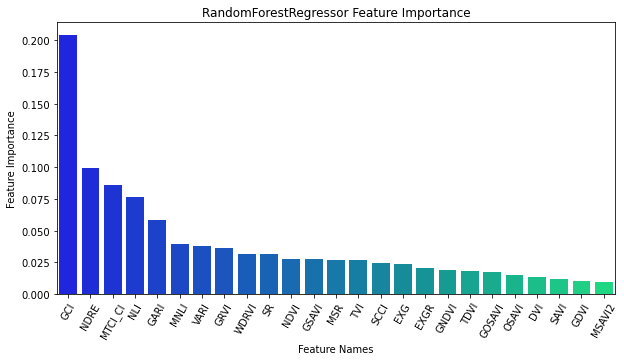

Training:  Robot_2020_Trapz Test:  Graminor_2019_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 75.77066033524333        R2 Test: -1.266847470670343
RMSE Train: 16.519649654495193       R2 Train: 0.9724398383354055


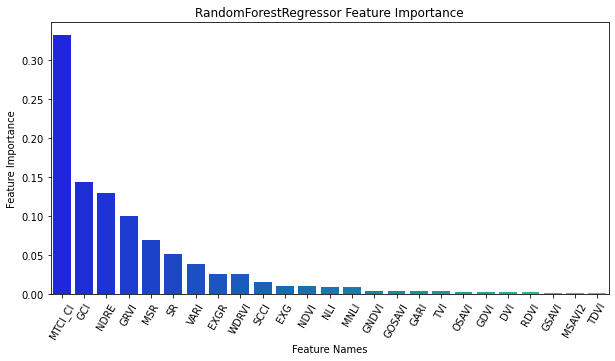

Training:  Robot_2020_Trapz Test:  Graminor_2020_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 162.44177242810431        R2 Test: -1.652927198402132
RMSE Train: 16.51964965449519       R2 Train: 0.9724398383354056


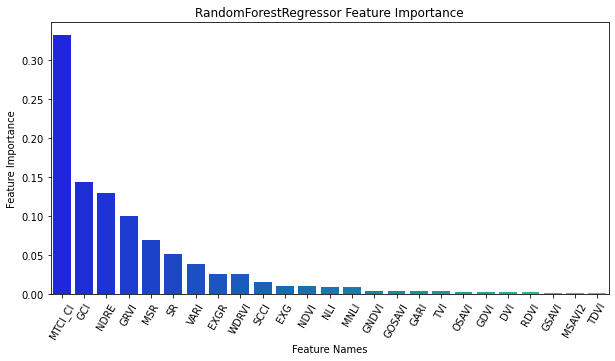

Training:  Robot_2020_Trapz Test:  Masbasis_2019_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 79.09649079905319        R2 Test: 0.1200717364247349
RMSE Train: 16.519649654495193       R2 Train: 0.9724398383354055


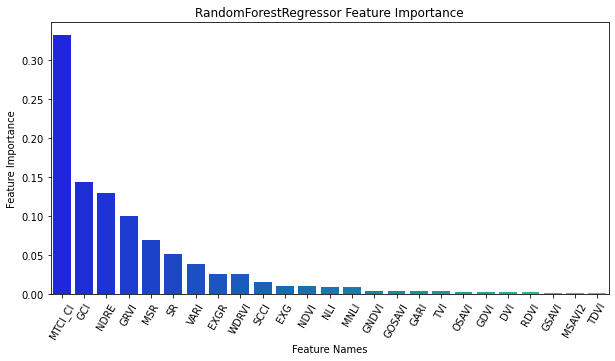

Training:  Robot_2020_Trapz Test:  Masbasis_2020_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 151.46319706192827        R2 Test: -1.5109381487595903
RMSE Train: 16.51964965449519       R2 Train: 0.9724398383354056


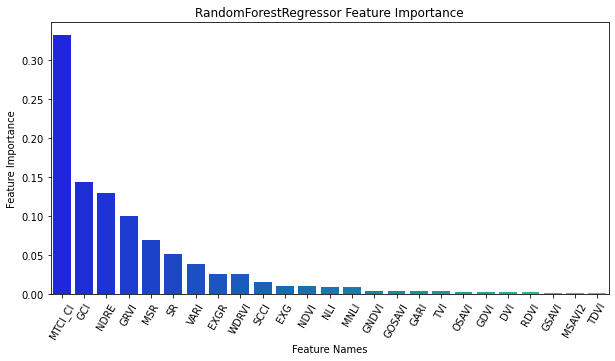

Training:  Robot_2020_Trapz Test:  Staur_2019_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 86.86569307885132        R2 Test: 0.16347156589509493
RMSE Train: 16.519649654495186       R2 Train: 0.9724398383354056


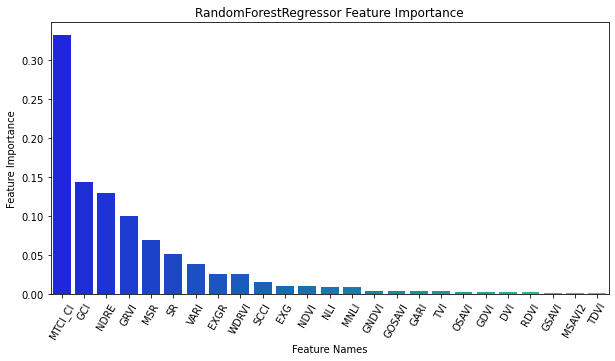

Training:  Robot_2020_Trapz Test:  Staur_2020_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 109.63720463472744        R2 Test: -0.5471765728239193
RMSE Train: 16.519649654495193       R2 Train: 0.9724398383354055


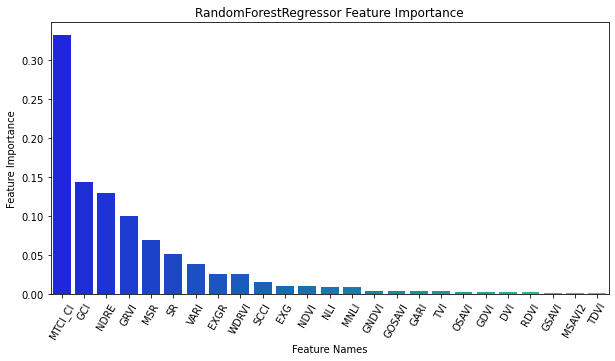

Training:  Staur_2019_Trapz Test:  Graminor_2019_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 138.21717158658993        R2 Test: -6.543000865821647
RMSE Train: 26.53301962253594       R2 Train: 0.9219527714992628


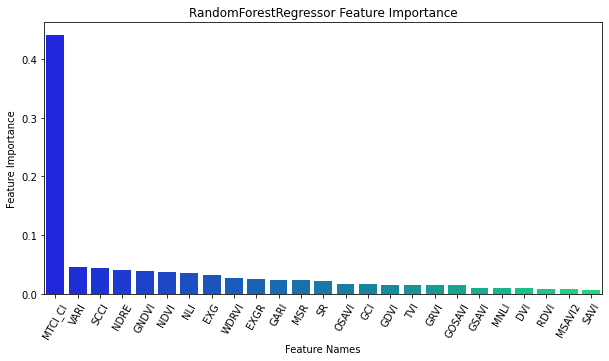

Training:  Staur_2019_Trapz Test:  Graminor_2020_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 200.78974710496496        R2 Test: -3.053339292380704
RMSE Train: 26.533019622535935       R2 Train: 0.9219527714992628


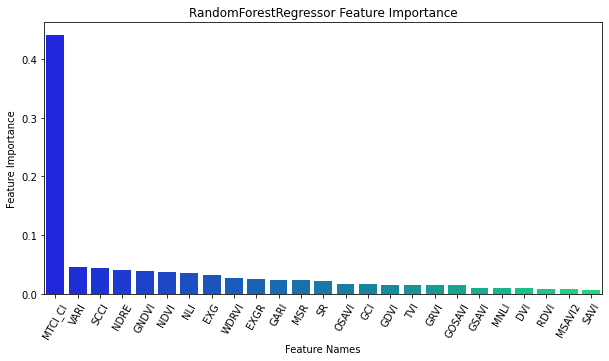

Training:  Staur_2019_Trapz Test:  Masbasis_2019_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 113.07902440289567        R2 Test: -0.7984440919305269
RMSE Train: 26.533019622535935       R2 Train: 0.9219527714992628


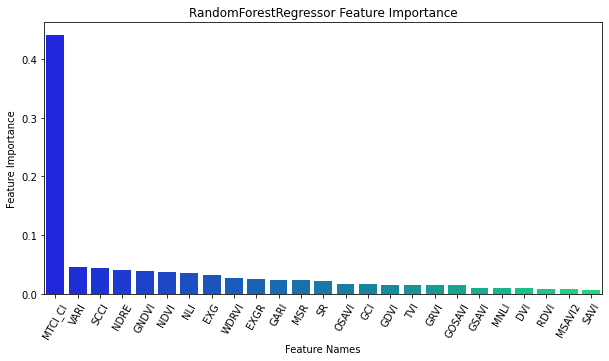

Training:  Staur_2019_Trapz Test:  Masbasis_2020_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 179.8023670730259        R2 Test: -2.538446107930771
RMSE Train: 26.533019622535935       R2 Train: 0.9219527714992628


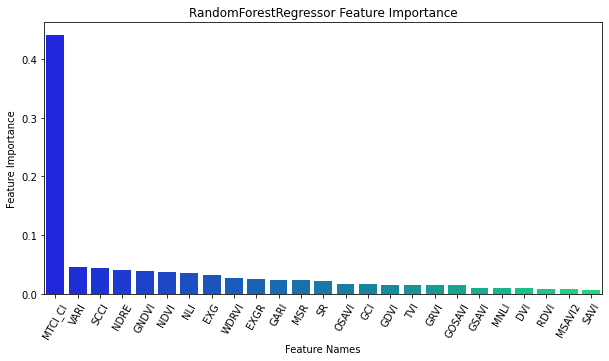

Training:  Staur_2019_Trapz Test:  Robot_2020_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 79.70566686323025        R2 Test: 0.35840865778809716
RMSE Train: 26.533019622535935       R2 Train: 0.9219527714992628


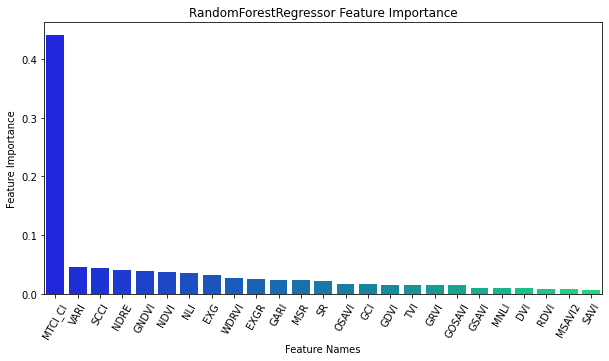

Training:  Staur_2019_Trapz Test:  Staur_2020_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 179.1978538353131        R2 Test: -3.133230074420303
RMSE Train: 26.533019622535935       R2 Train: 0.9219527714992628


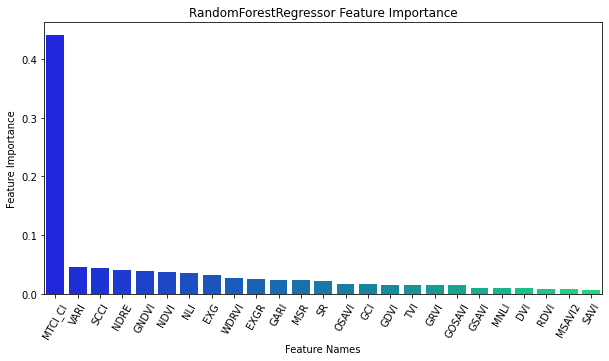

Training:  Staur_2020_Trapz Test:  Graminor_2019_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 71.37503617856086        R2 Test: -1.0114666542466817
RMSE Train: 18.925984557311782       R2 Train: 0.9538957527645336


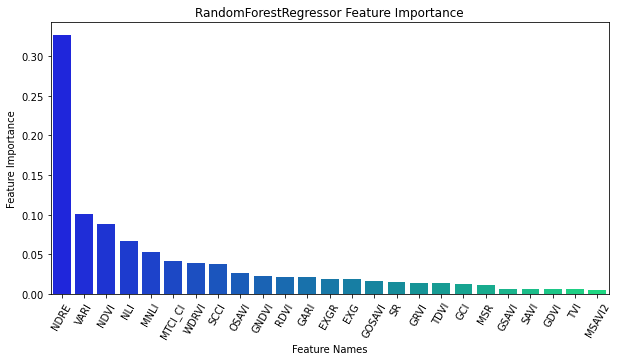

Training:  Staur_2020_Trapz Test:  Graminor_2020_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 118.15688276172196        R2 Test: -0.40361481295449475
RMSE Train: 18.925984557311782       R2 Train: 0.9538957527645336


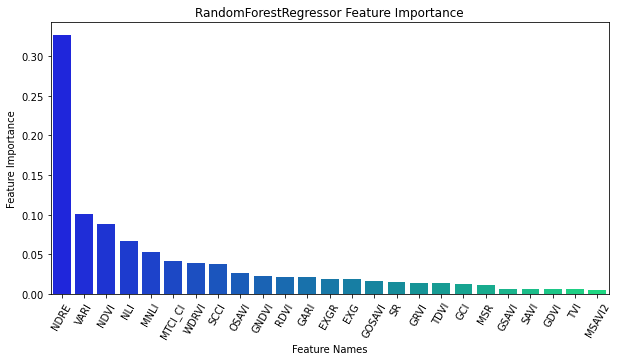

Training:  Staur_2020_Trapz Test:  Masbasis_2019_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 69.053527814122        R2 Test: 0.32933664500455195
RMSE Train: 18.925984557311786       R2 Train: 0.9538957527645336


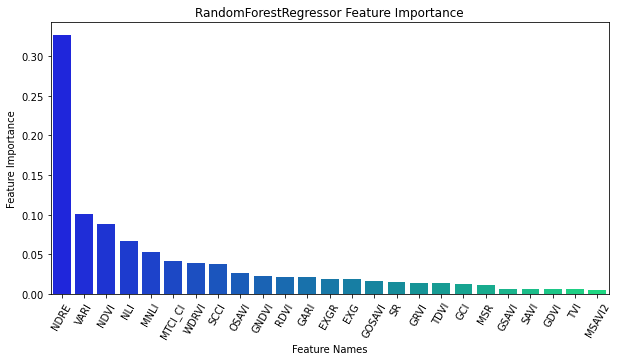

Training:  Staur_2020_Trapz Test:  Masbasis_2020_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 82.05519536065486        R2 Test: 0.2630569229463776
RMSE Train: 18.925984557311786       R2 Train: 0.9538957527645336


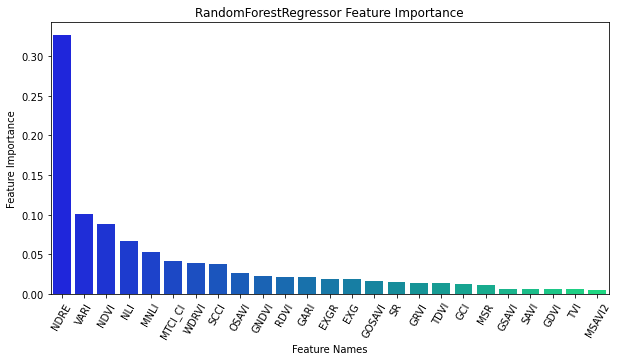

Training:  Staur_2020_Trapz Test:  Robot_2020_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 96.56050956581834        R2 Test: 0.05837237021785924
RMSE Train: 18.925984557311782       R2 Train: 0.9538957527645336


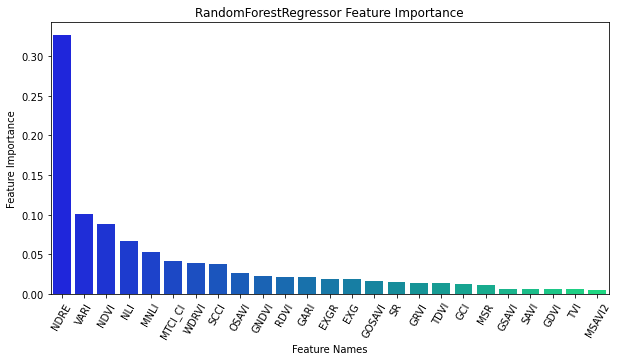

Training:  Staur_2020_Trapz Test:  Staur_2019_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 141.70957702489198        R2 Test: -1.2262940865153715
RMSE Train: 18.925984557311782       R2 Train: 0.9538957527645336


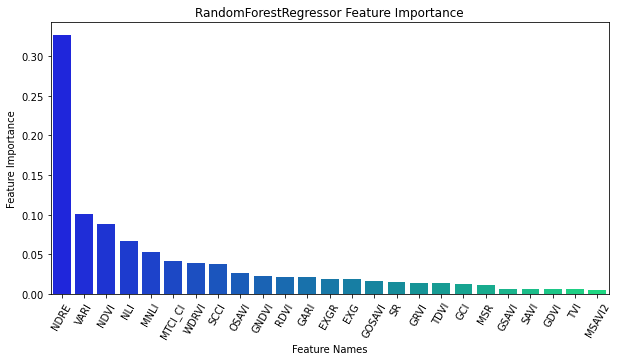

In [42]:
# Iterating through all possible permutations of the fields dataset

for i in itertools.permutations(all_df_now, 2):
    train_df = locals()[i[0]].copy()
    test_df = locals()[i[1]].copy()
    
    
    X_train = train_df[training_features]
    y_train = train_df[target_features].values.ravel()
    X_test = test_df[training_features]
    y_test = test_df[target_features].values.ravel()
    
    # Getting scores using cross_val_score
    for model in models:
        print('Training: ', i[0],'Test: ', i[1], ' : ', model)
        importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp = training_regr(
            model, X_train, y_train, X_test, y_test)
        if importances is not None:
            plot_feat_imp(importances, model, training_features, threshold=threshold_all, sort_feat=True)
            
        save_results(model=model,
             agg_method=agg_method,
             train_field=i[0],
             test_field=i[1],
             training_features=training_features,
             importances=importances,
             RMSE_test=RMSE_test_temp,
             RMSE_train=RMSE_train_temp,
             R2_test=R2_test_temp,
             R2_train=R2_train_temp,
             GKF_CV=GKF_CV_temp)
    del (i, train_df, test_df, X_train, y_train, X_test, y_test)
    del (importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, model)

### One aganist all together

Graminor_2019_Trapz ['Graminor_2020_Trapz', 'Masbasis_2019_Trapz', 'Masbasis_2020_Trapz', 'Staur_2019_Trapz', 'Staur_2020_Trapz']
Training: All   Test:  Graminor_2019_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 72.33986096346203        R2 Test: -1.0662149234716551
RMSE Train: 22.284368273558766       R2 Train: 0.9636119699389518


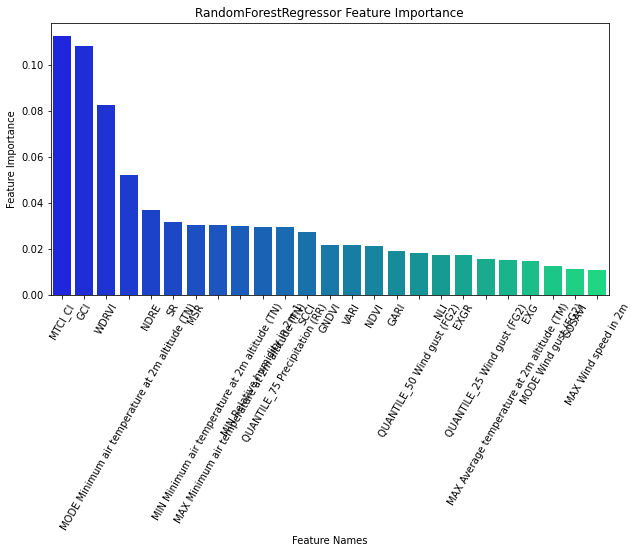

Graminor_2020_Trapz ['Graminor_2019_Trapz', 'Masbasis_2019_Trapz', 'Masbasis_2020_Trapz', 'Staur_2019_Trapz', 'Staur_2020_Trapz']
Training: All   Test:  Graminor_2020_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 106.69524160510144        R2 Test: -0.14451106468272923
RMSE Train: 22.352486217505604       R2 Train: 0.9541931731227596


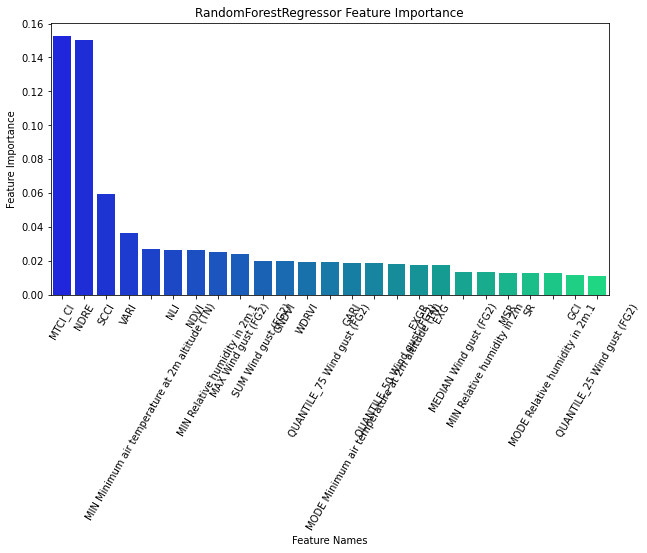

Masbasis_2019_Trapz ['Graminor_2019_Trapz', 'Graminor_2020_Trapz', 'Masbasis_2020_Trapz', 'Staur_2019_Trapz', 'Staur_2020_Trapz']
Training: All   Test:  Masbasis_2019_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 64.88863073010603        R2 Test: 0.40779774698622295
RMSE Train: 21.792348853162036       R2 Train: 0.9630913573957406


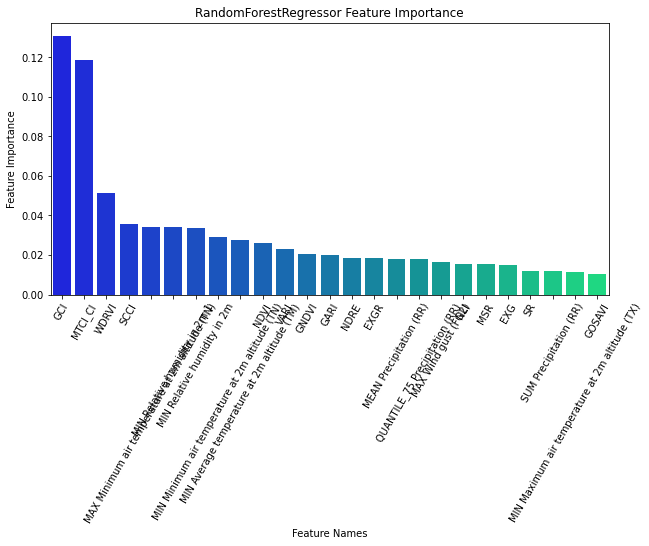

Masbasis_2020_Trapz ['Graminor_2019_Trapz', 'Graminor_2020_Trapz', 'Masbasis_2019_Trapz', 'Staur_2019_Trapz', 'Staur_2020_Trapz']
Training: All   Test:  Masbasis_2020_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 94.28853441347195        R2 Test: 0.02694016549974465
RMSE Train: 21.053026457014482       R2 Train: 0.9629737744186364


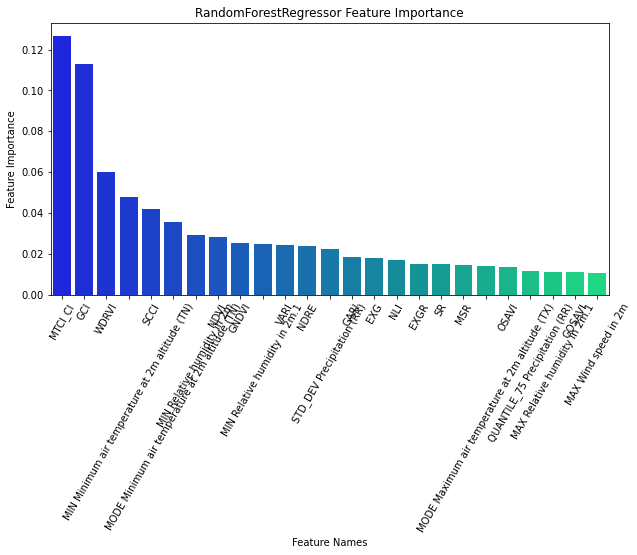

Staur_2019_Trapz ['Graminor_2019_Trapz', 'Graminor_2020_Trapz', 'Masbasis_2019_Trapz', 'Masbasis_2020_Trapz', 'Staur_2020_Trapz']
Training: All   Test:  Staur_2019_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 145.5710540506462        R2 Test: -1.349276760244022
RMSE Train: 19.16629884634531       R2 Train: 0.9581259093275284


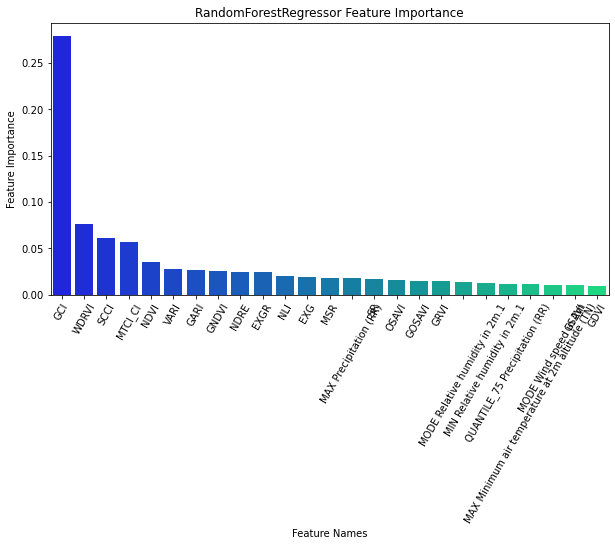

Staur_2020_Trapz ['Graminor_2019_Trapz', 'Graminor_2020_Trapz', 'Masbasis_2019_Trapz', 'Masbasis_2020_Trapz', 'Staur_2019_Trapz']
Training: All   Test:  Staur_2020_Trapz  :  RandomForestRegressor(n_jobs=-1, random_state=1)
 RMSE Test: 79.46864234261312        R2 Test: 0.18714036153635583
RMSE Train: 21.90081225292992       R2 Train: 0.9635681340894703


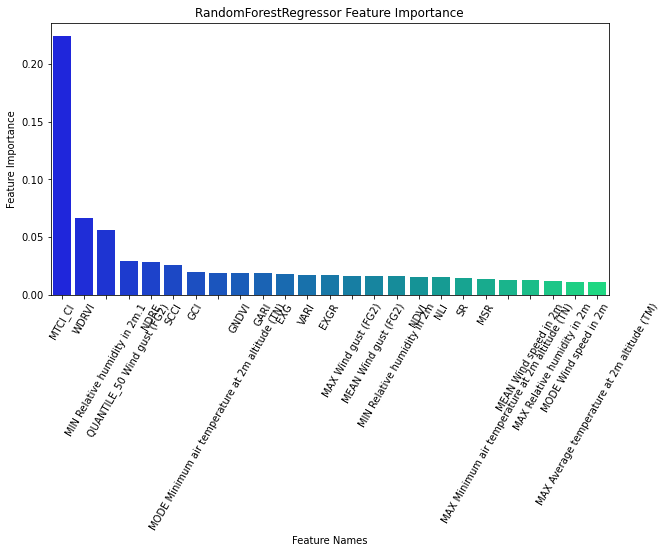

In [43]:
# Iterating through all possible permutations of the fields dataset
for df in all_df_now:
    if 'Robot' not in df:
        temp_list = [
            x for x in all_df_now if not 'Robot' in x if not df in x
        ]
        print(df, temp_list)

        # Making list of df for conct before training
        # This is different form list of srtings, as this is a list of actual dataframes
        train_df_list = []
        for x in temp_list:
            train_df_list.append(locals()[x])

        train_df = pd.concat(train_df_list)
        test_df = locals()[df].copy()

        X_train = train_df[training_features]
        y_train = train_df[target_features].values.ravel()
        X_test = test_df[training_features]
        y_test = test_df[target_features].values.ravel()

        # Getting scores using cross_val_score
        for model in models:
            print('Training: All  ', 'Test: ', df, ' : ', model)
            importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp = training_regr(
                model, X_train, y_train, X_test, y_test)
            if importances is not None:
                plot_feat_imp(importances,
                              model,
                              training_features,
                              threshold=threshold_all,
                              sort_feat=sorted_all)
            save_results(model=model,
                         agg_method=agg_method,
                         train_field=temp_list,
                         test_field=df,
                         training_features=training_features,
                         importances=importances,
                         RMSE_test=RMSE_test_temp,
                         RMSE_train=RMSE_train_temp,
                         R2_test=R2_test_temp,
                         R2_train=R2_train_temp,
                         GKF_CV=GKF_CV_temp)
        del (df, temp_list, train_df_list, train_df, test_df, X_train, y_train, X_test, y_test)
        del (importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, model)

### Vollebekk ALL vs Staur ALL

#### Training Staur, Test Vollebekk

Training data: ['Staur_2019_Trapz', 'Staur_2020_Trapz']
Test data: ['Graminor_2019_Trapz', 'Graminor_2020_Trapz', 'Masbasis_2019_Trapz', 'Masbasis_2020_Trapz']
 RMSE Test: 100.45168439830046        R2 Test: -0.11221469958181784
RMSE Train: 23.488013954328842       R2 Train: 0.9533811978259548


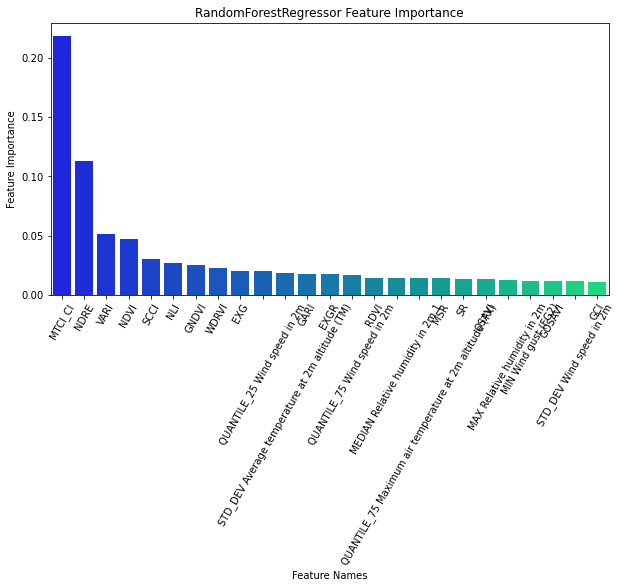

In [44]:
train_str_list, test_str_list = list_test_train_df(all_df_now,
                                                   train_field = 'Staur', 
                                                   test_field = 'Vollebekk', 
                                                   year = 'all')

train_df_list = []
test_df_list = []
for x in train_str_list:
    train_df_list.append(locals()[x])
for x in test_str_list:
    test_df_list.append(locals()[x])

train_df = pd.concat(train_df_list)
test_df = pd.concat(test_df_list)

X_train = train_df[training_features]
y_train = train_df[target_features].values.ravel()
X_test = test_df[training_features]
y_test = test_df[target_features].values.ravel()

# Getting scores using cross_val_score
for model in models:
    importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp = training_regr(
        model, X_train, y_train, X_test, y_test)
    if importances is not None:
        plot_feat_imp(importances,
                      model,
                      training_features,
                      threshold=threshold_all,
                      sort_feat=sorted_all)
    save_results(model=model,
                 agg_method=agg_method,
                 train_field=train_str_list,
                 test_field=test_str_list,
                 training_features=training_features,
                 importances=importances,
                 RMSE_test=RMSE_test_temp,
                 RMSE_train=RMSE_train_temp,
                 R2_test=R2_test_temp,
                 R2_train=R2_train_temp,
                 GKF_CV=GKF_CV_temp)
del (train_str_list, test_str_list, train_df_list, test_df_list, train_df, test_df, X_train, y_train, X_test, y_test)
del (importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, model)

#### Training Vollebekk, Test Staur

Training data: ['Graminor_2019_Trapz', 'Graminor_2020_Trapz', 'Masbasis_2019_Trapz', 'Masbasis_2020_Trapz']
Test data: ['Staur_2019_Trapz', 'Staur_2020_Trapz']
 RMSE Test: 120.08842273146261        R2 Test: -0.2186270094258309
RMSE Train: 19.22670573816599       R2 Train: 0.9592540973989697


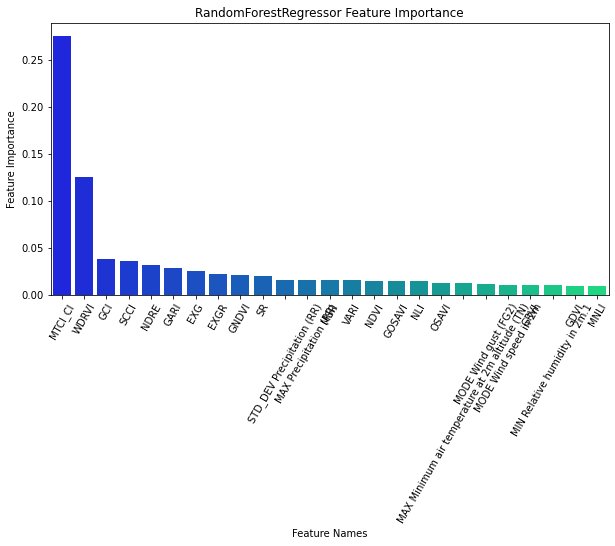

In [45]:
train_str_list, test_str_list = list_test_train_df(all_df_now,
                                                   train_field = 'Vollebekk', 
                                                   test_field = 'Staur', 
                                                   year = 'all')

train_df_list = []
test_df_list = []
for x in train_str_list:
    train_df_list.append(locals()[x])
for x in test_str_list:
    test_df_list.append(locals()[x])

train_df = pd.concat(train_df_list)
test_df = pd.concat(test_df_list)

X_train = train_df[training_features]
y_train = train_df[target_features].values.ravel()
X_test = test_df[training_features]
y_test = test_df[target_features].values.ravel()

# Getting scores using cross_val_score
for model in models:
    importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp = training_regr(
        model, X_train, y_train, X_test, y_test)
    if importances is not None:
        plot_feat_imp(importances,
                      model,
                      training_features,
                      threshold=threshold_all,
                      sort_feat=sorted_all)
    save_results(model=model,
                 agg_method=agg_method,
                 train_field=train_str_list,
                 test_field=test_str_list,
                 training_features=training_features,
                 importances=importances,
                 RMSE_test=RMSE_test_temp,
                 RMSE_train=RMSE_train_temp,
                 R2_test=R2_test_temp,
                 R2_train=R2_train_temp,
                 GKF_CV=GKF_CV_temp)
del (train_str_list, test_str_list, train_df_list, test_df_list, train_df, test_df, X_train, y_train, X_test, y_test)
del (importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, model)

### 2020 Vollebekk vs 2020 Staur

#### Training Staur, Test Vollebekk

Training data: ['Staur_2020_Trapz']
Test data: ['Graminor_2020_Trapz', 'Masbasis_2020_Trapz']
 RMSE Test: 105.05454908981633        R2 Test: -0.1380917332370788
RMSE Train: 18.925984557311782       R2 Train: 0.9538957527645336


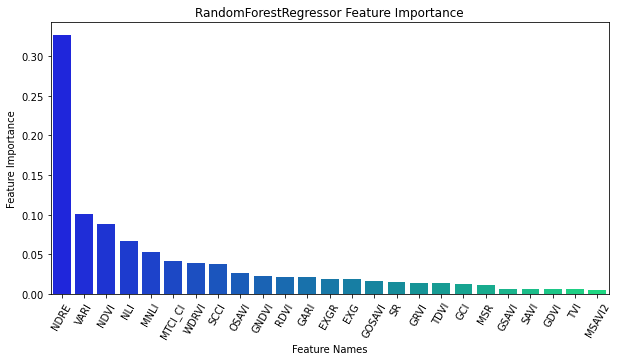

In [46]:
train_str_list, test_str_list = list_test_train_df(all_df_now,
                                                   train_field = 'Staur', 
                                                   test_field = 'Vollebekk', 
                                                   year = '2020')

train_df_list = []
test_df_list = []
for x in train_str_list:
    train_df_list.append(locals()[x])
for x in test_str_list:
    test_df_list.append(locals()[x])

train_df = pd.concat(train_df_list)
test_df = pd.concat(test_df_list)

X_train = train_df[training_features]
y_train = train_df[target_features].values.ravel()
X_test = test_df[training_features]
y_test = test_df[target_features].values.ravel()

# Getting scores using cross_val_score
for model in models:
    importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp = training_regr(
        model, X_train, y_train, X_test, y_test)
    if importances is not None:
        plot_feat_imp(importances,
                      model,
                      training_features,
                      threshold=threshold_all,
                      sort_feat=sorted_all)
    save_results(model=model,
                 agg_method=agg_method,
                 train_field=train_str_list,
                 test_field=test_str_list,
                 training_features=training_features,
                 importances=importances,
                 RMSE_test=RMSE_test_temp,
                 RMSE_train=RMSE_train_temp,
                 R2_test=R2_test_temp,
                 R2_train=R2_train_temp,
                 GKF_CV=GKF_CV_temp)
del (train_str_list, test_str_list, train_df_list, test_df_list, train_df, test_df, X_train, y_train, X_test, y_test)
del (importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, model)

#### Training Vollebekk, Test Staur

Training data: ['Graminor_2020_Trapz', 'Masbasis_2020_Trapz']
Test data: ['Staur_2020_Trapz']
 RMSE Test: 82.5830098498751        R2 Test: 0.12218017017303884
RMSE Train: 20.67348817684838       R2 Train: 0.955926751439296


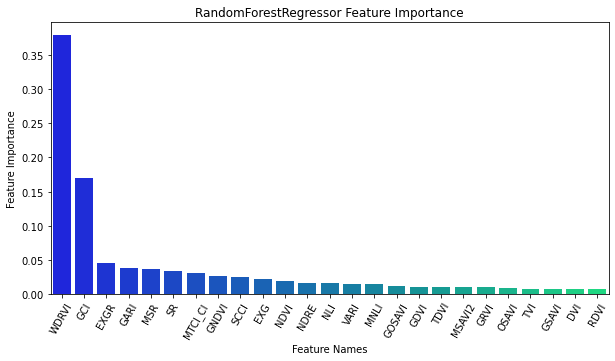

In [47]:
train_str_list, test_str_list = list_test_train_df(all_df_now,
                                                   train_field = 'Vollebekk', 
                                                   test_field = 'Staur', 
                                                   year = '2020')

train_df_list = []
test_df_list = []
for x in train_str_list:
    train_df_list.append(locals()[x])
for x in test_str_list:
    test_df_list.append(locals()[x])

train_df = pd.concat(train_df_list)
test_df = pd.concat(test_df_list)

X_train = train_df[training_features]
y_train = train_df[target_features].values.ravel()
X_test = test_df[training_features]
y_test = test_df[target_features].values.ravel()

# Getting scores using cross_val_score
for model in models:
    importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp = training_regr(
        model, X_train, y_train, X_test, y_test)
    if importances is not None:
        plot_feat_imp(importances,
                      model,
                      training_features,
                      threshold=threshold_all,
                      sort_feat=sorted_all)
    save_results(model=model,
                 agg_method=agg_method,
                 train_field=train_str_list,
                 test_field=test_str_list,
                 training_features=training_features,
                 importances=importances,
                 RMSE_test=RMSE_test_temp,
                 RMSE_train=RMSE_train_temp,
                 R2_test=R2_test_temp,
                 R2_train=R2_train_temp,
                 GKF_CV=GKF_CV_temp)
del (train_str_list, test_str_list, train_df_list, test_df_list, train_df, test_df, X_train, y_train, X_test, y_test)
del (importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, model)

### 2019 Vollebekk vs 2019 Staur

#### Training Staur, Test Vollebekk

Training data: ['Staur_2019_Trapz']
Test data: ['Graminor_2019_Trapz', 'Masbasis_2019_Trapz']
 RMSE Test: 127.13136298703827        R2 Test: -2.4530526829315757
RMSE Train: 26.53301962253594       R2 Train: 0.9219527714992628


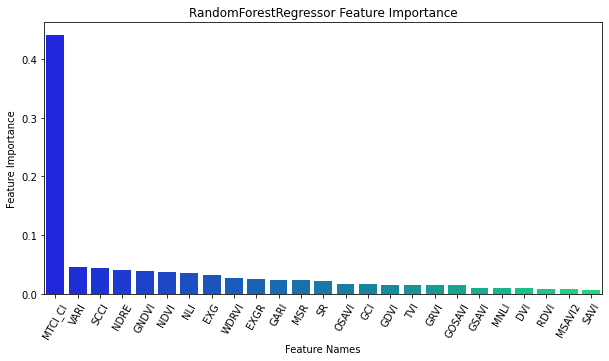

In [48]:
train_str_list, test_str_list = list_test_train_df(all_df_now,
                                                   train_field = 'Staur', 
                                                   test_field = 'Vollebekk', 
                                                   year = '2019')

train_df_list = []
test_df_list = []
for x in train_str_list:
    train_df_list.append(locals()[x])
for x in test_str_list:
    test_df_list.append(locals()[x])

train_df = pd.concat(train_df_list)
test_df = pd.concat(test_df_list)

X_train = train_df[training_features]
y_train = train_df[target_features].values.ravel()
X_test = test_df[training_features]
y_test = test_df[target_features].values.ravel()

# Getting scores using cross_val_score
for model in models:
    importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp = training_regr(
        model, X_train, y_train, X_test, y_test)
    if importances is not None:
        plot_feat_imp(importances,
                      model,
                      training_features,
                      threshold=threshold_all,
                      sort_feat=sorted_all)
    save_results(model=model,
                 agg_method=agg_method,
                 train_field=train_str_list,
                 test_field=test_str_list,
                 training_features=training_features,
                 importances=importances,
                 RMSE_test=RMSE_test_temp,
                 RMSE_train=RMSE_train_temp,
                 R2_test=R2_test_temp,
                 R2_train=R2_train_temp,
                 GKF_CV=GKF_CV_temp)
del (train_str_list, test_str_list, train_df_list, test_df_list, train_df, test_df, X_train, y_train, X_test, y_test)
del (importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, model)

#### Training Vollebekk, Test Staur

Training data: ['Graminor_2019_Trapz', 'Masbasis_2019_Trapz']
Test data: ['Staur_2019_Trapz']
 RMSE Test: 117.21165813281048        R2 Test: -0.5230906381203551
RMSE Train: 17.41237059297209       R2 Train: 0.9352240782313409


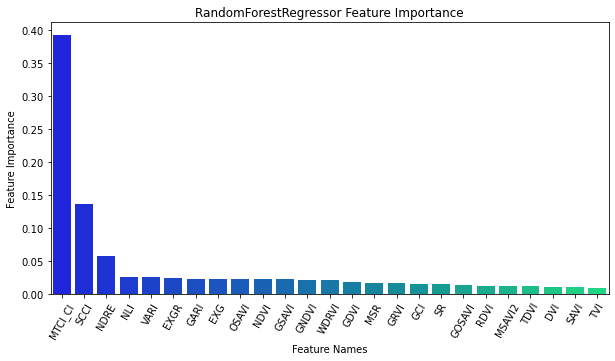

In [49]:
train_str_list, test_str_list = list_test_train_df(all_df_now,
                                                   train_field = 'Vollebekk', 
                                                   test_field = 'Staur', 
                                                   year = '2019')

train_df_list = []
test_df_list = []
for x in train_str_list:
    train_df_list.append(locals()[x])
for x in test_str_list:
    test_df_list.append(locals()[x])

train_df = pd.concat(train_df_list)
test_df = pd.concat(test_df_list)

X_train = train_df[training_features]
y_train = train_df[target_features].values.ravel()
X_test = test_df[training_features]
y_test = test_df[target_features].values.ravel()

# Getting scores using cross_val_score
for model in models:
    importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp = training_regr(
        model, X_train, y_train, X_test, y_test)
    if importances is not None:
        plot_feat_imp(importances,
                      model,
                      training_features,
                      threshold=threshold_all,
                      sort_feat=sorted_all)
    save_results(model=model,
                 agg_method=agg_method,
                 train_field=train_str_list,
                 test_field=test_str_list,
                 training_features=training_features,
                 importances=importances,
                 RMSE_test=RMSE_test_temp,
                 RMSE_train=RMSE_train_temp,
                 R2_test=R2_test_temp,
                 R2_train=R2_train_temp,
                 GKF_CV=GKF_CV_temp)
del (train_str_list, test_str_list, train_df_list, test_df_list, train_df, test_df, X_train, y_train, X_test, y_test)
del (importances, RMSE_test_temp, RMSE_train_temp, R2_test_temp, R2_train_temp, GKF_CV_temp, model)

###

###

# Plotting Results

In [55]:
pd.read_csv(export_path+'results_org.csv')

,Model,Aggregation_method,Train_field,Test_field,Training_features,Feature_Importances,RMSE_test,RMSE_train,R2_test,R2_train,GKF_CV,DataTime
0,"RandomForestRegressor(n_jobs=-1, random_state=1)",Simpsons,Graminor_2019_Simps,Graminor_2019_Simps,"['NDVI', 'DVI', 'GDVI', 'MTCI_CI', 'EXG', 'EXG...",[0.02173219 0.01500883 0.03101253 0.38091298 0...,40.94 (+/- -2.65),15.35 (+/- -0.71),0.34 (+/- 0.05),0.91 (+/- 0.01),"[(array([ 1, 2, 3, 4, 5, 6, 8, ...",52:44.5
1,"RandomForestRegressor(n_jobs=-1, random_state=1)",Simpsons,Graminor_2020_Simps,Graminor_2020_Simps,"['NDVI', 'DVI', 'GDVI', 'MTCI_CI', 'EXG', 'EXG...",[0.01735766 0.0123695 0.01832949 0.01906112 0...,45.05 (+/- -3.72),16.79 (+/- -0.78),0.79 (+/- 0.02),0.97 (+/- 0.00),"[(array([ 2, 4, 6, 9, 11, 12, 14, 1...",52:47.7
2,"RandomForestRegressor(n_jobs=-1, random_state=1)",Simpsons,Masbasis_2019_Simps,Masbasis_2019_Simps,"['NDVI', 'DVI', 'GDVI', 'MTCI_CI', 'EXG', 'EXG...",[0.01539759 0.00586976 0.01175245 0.05765235 0...,54.65 (+/- -6.31),20.07 (+/- -1.42),0.57 (+/- 0.13),0.94 (+/- 0.01),"[(array([ 0, 1, 3, 4, 5, 7, 12, 1...",52:49.8
3,"RandomForestRegressor(n_jobs=-1, random_state=1)",Simpsons,Masbasis_2020_Simps,Masbasis_2020_Simps,"['NDVI', 'DVI', 'GDVI', 'MTCI_CI', 'EXG', 'EXG...",[0.03062534 0.01641579 0.01572018 0.08499657 0...,69.94 (+/- -11.26),25.65 (+/- -2.47),0.46 (+/- 0.09),0.93 (+/- 0.01),"[(array([ 1, 2, 3, 4, 7, 8, 11, 1...",52:51.6
4,"RandomForestRegressor(n_jobs=-1, random_state=1)",Simpsons,Robot_2020_Simps,Robot_2020_Simps,"['NDVI', 'DVI', 'GDVI', 'MTCI_CI', 'EXG', 'EXG...",[0.01325907 0.00223436 0.00209374 0.43636196 0...,47.39 (+/- -8.87),17.75 (+/- -1.30),0.77 (+/- 0.08),0.97 (+/- 0.00),"[(array([ 1, 2, 3, 5, 6, 8, 10, 11, 12, 1...",52:52.8
...,...,...,...,...,...,...,...,...,...,...,...,...
117,"RandomForestRegressor(n_jobs=-1, random_state=1)",Trapezoid,"['Graminor_2019_Trapz', 'Graminor_2020_Trapz',...","['Staur_2019_Trapz', 'Staur_2020_Trapz']","['NDVI', 'DVI', 'GDVI', 'MTCI_CI', 'EXG', 'EXG...",[1.46582250e-02 6.29104803e-03 9.44137418e-03 ...,120.0884227,19.22670574,-0.218627009,0.959254097,FALSE,20:48.3
118,"RandomForestRegressor(n_jobs=-1, random_state=1)",Trapezoid,['Staur_2020_Trapz'],"['Graminor_2020_Trapz', 'Masbasis_2020_Trapz']","['NDVI', 'DVI', 'GDVI', 'MTCI_CI', 'EXG', 'EXG...",[0.08792166 0.00484093 0.00597613 0.0410796 0...,105.0545491,18.92598456,-0.138091733,0.953895753,FALSE,20:49.6
119,"RandomForestRegressor(n_jobs=-1, random_state=1)",Trapezoid,"['Graminor_2020_Trapz', 'Masbasis_2020_Trapz']",['Staur_2020_Trapz'],"['NDVI', 'DVI', 'GDVI', 'MTCI_CI', 'EXG', 'EXG...",[1.84884687e-02 6.80456289e-03 1.08504842e-02 ...,82.58300985,20.67348818,0.12218017,0.955926751,FALSE,20:51.6
120,"RandomForestRegressor(n_jobs=-1, random_state=1)",Trapezoid,['Staur_2019_Trapz'],"['Graminor_2019_Trapz', 'Masbasis_2019_Trapz']","['NDVI', 'DVI', 'GDVI', 'MTCI_CI', 'EXG', 'EXG...",[0.0380253 0.00978269 0.01593529 0.44030908 0...,127.131363,26.53301962,-2.453052683,0.921952771,FALSE,20:53.4


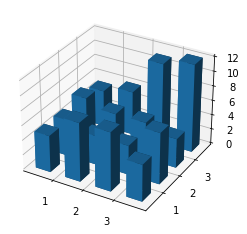

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = np.random.rand(2, 100) * 4
hist, xedges, yedges = np.histogram2d(x, y, bins=4, range=[[0, 4], [0, 4]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

In [61]:
hist

array([[ 5.,  5.,  6.,  5.],
       [ 8.,  4.,  5.,  6.],
       [ 8.,  4.,  5., 11.],
       [ 5.,  7.,  4., 12.]])

### GroupKFold

###

In [62]:
# Iterating through all possible permutations of the fields dataset
results = []
for i in itertools.permutations(all_df_now, 2):

#     train_df = locals()[i[0]].copy()
#     test_df = locals()[i[1]].copy()

    train_size = 0.7*locals()[i[0]].shape[0]
    
    train_df = locals()[i[0]].copy()
    test_df = locals()[i[1]].copy()
    
    print(f"Train dataset: {i[0]} {train_df['GrainYield'].isna().sum()}\
    \n Test dataset: {i[1]} {test_df['GrainYield'].isna().sum()}")
    print('=>')
#     print(f"Missing values in {i[0]} {train_df['GrainYield'].isna().sum()}\
#     \n Missing values in {i[1]} {test_df['GrainYield'].isna().sum()}")
    # Dropping entries with grainyield missing
    train_df.dropna(subset=['GrainYield'], inplace=True)
    test_df.dropna(subset=['GrainYield'], inplace=True)

    #==============================================================================
    # Create separate train/test splits from Main data
    #==============================================================================
    X_train, y_train, = train_df[[x for x in train_df.columns if x not in yield_cols+id_cols_new]], train_df['GrainYield']
    X_test, y_test = test_df[[x for x in test_df.columns if x not in yield_cols+id_cols_new]], test_df['GrainYield']
    features = X_train.columns

    #==============================================================================
    # Scale features using StandardScaler class in scikit-learn 
    #==============================================================================

    # Initialise standard scaler and compute mean and STD from training data
    sc = StandardScaler()
    sc.fit(X_train)

    # Transform (standardise) both X_train and X_test with mean and STD from
    # training data
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    
    for model in models:
        print(model)
        acc, acc_std, imp = test_data_regression(model, features, X_train, X_train_std, y_train, X_test, X_test_std, y_test)
#         results.append([i[0], i[1], model, acc, acc_std, imp, imp_std])
        print('=============================================')

Train dataset: Graminor_2019_Simps 0    
 Test dataset: Graminor_2020_Simps 0
=>


NameError: name 'id_cols_new' is not defined

In [ ]:
train_dfs = [x[0] for x in results]
test_dfs = [x[1] for x in results]
modelss = [x[2] for x in results]
acc_normal = [x[3] for x in results]
acc_stds = [x[4] for x in results]
imp_normal = [x[5] for x in results]
imp_stds = [x[6] for x in results]
# acc_normal

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = train_dfs, test_dfs
hist, xedges, yedges = np.histogram2d(x, y, bins=4, range=[[0, 4], [0, 4]])

# Construct arrays for the anchor positions of the 16 bars.
# xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
# xpos = xpos.ravel()
# ypos = ypos.ravel()
# zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

In [ ]:
model = RandomForestRegressor(n_estimators = 1000, max_depth=250, min_samples_split=5, random_state=0, n_jobs = -1)
model = RandomForestRegressor(n_estimators = 50, max_depth=100, min_samples_split=400, random_state=0, n_jobs = -1)


## Several Models: To clean

In [63]:
#==============================================================================
# Ridge
#==============================================================================
from sklearn.linear_model import Ridge
model = Ridge()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__alpha' : [x*1. for x in range(1,10)],
                  'model__solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)
#==============================================================================
# Lasso
#==============================================================================
from sklearn.linear_model import Lasso
model = Lasso()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__alpha' : [x*0.1 for x in range(1,10)],
                  'model__max_iter' : [x for x in range(50, 10000, 50)],
                  'model__selection' : ['cyclic','random']}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)
#==============================================================================
# ElasticNet
#==============================================================================
from sklearn.linear_model import ElasticNet
model = ElasticNet()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__alpha' : [x*0.1 for x in range(1,10)],
                  'model__max_iter' : [x for x in range(50, 10000, 50)],
                  'model__l1_ratio' : [x*0.1 for x in range(1,10)]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)
#==============================================================================
# OrthogonalMatchingPursuit
#==============================================================================
from sklearn.linear_model import OrthogonalMatchingPursuit
model = OrthogonalMatchingPursuit()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__fit_intercept' : [True, False],
                  'model__n_nonzero_coefs' : [x for x in range(1,10)]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)
#==============================================================================
# BayesianRidge
#==============================================================================
from sklearn.linear_model import BayesianRidge
model = BayesianRidge()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__n_iter' : [x for x in range(5, 150, 10)],
                  'model__alpha_1' : [1.0],
                  'model__alpha_2' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
                  'model__lambda_1' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
                  'model__lambda_2' : [1.0]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)
#==============================================================================
# ARDRegression
#==============================================================================
from sklearn.linear_model import ARDRegression
model = ARDRegression()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__n_iter' : [x for x in range(5, 150, 10)],
                  'model__alpha_1' : [1.0],
#                       'model__alpha_2' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
                  'model__lambda_1' : [0.01],
                  'model__lambda_2' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
                  'model__verbose' : [True]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)
#==============================================================================
# RANSACRegressor
#==============================================================================
from sklearn.linear_model import RANSACRegressor
model = RANSACRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__min_samples' : [x/.1 for x in range(1, 10)],
                  'model__max_trials' : [x for x in range(1, 500,50)],
                  'model__loss' : ['absolute_loss', 'squared_loss']}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)
#==============================================================================
# TheilSenRegressor
#==============================================================================
# from sklearn.linear_model import TheilSenRegressor
# model = TheilSenRegressor()
# sc = StandardScaler()
# pipe = Pipeline(steps=[('sc', sc), ('model', model)])
# param_grid   =  [{'model__max_subpopulation' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]],
#                   'model__n_subsamples' : [x for x in range(9, 1300,50)],
#                   'model__max_iter' :  [x for x in range(50, 1000, 50)]}]
# estimator = pipe

# for score in scores:
#     grid(Xtrain = X,
#                 ytrain = y,
#                 estimator = pipe,
#                 params_grid = param_grid,
#                 scores=score,
#                 cvs = cv,
#                 cores=core,
#                 verb=verbos)
#     print(score)
#==============================================================================
# HuberRegressor
#==============================================================================
from sklearn.linear_model import HuberRegressor
model = HuberRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__epsilon' : [x/.01 for x in range(100, 200, 5)],
                  'model__alpha' : [x*0.000001 for x in [1,10,100,1000,10000,100000,1000000]]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)
#==============================================================================
# DecisionTreeRegressor
#==============================================================================
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__max_depth' : [None]+[x for x in range(1, 100,5)],
                  'model__min_samples_leaf' : [x for x in range(1, 50,5)],
                  'model__min_samples_split' : [2]+[x for x in range(1, 50,5)],
                  'model__max_features' : [x for x in range(1, 10)]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)
#==============================================================================
# GaussianProcessRegressor
#==============================================================================
from sklearn.gaussian_process import GaussianProcessRegressor
model = GaussianProcessRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__kernel' : [None]+['rbf', 'sigmoid',  'linear', 'poly'],
                  'model__alpha' : [x*0.0000000001 for x in [1,10,100,1000,10000,100000,1000000]]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)
#==============================================================================
# KNeighborsRegressor
#==============================================================================
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
param_grid   =  [{'model__n_neighbors' : [x for x in range(1, 100,5)],
                  'model__weights' : ['uniform', 'distance'],
                  'model__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'model__leaf_size' : [x for x in range(10, 50, 5)]}]
estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)
# #==============================================================================
# # RadiusNeighborsRegressor
# #==============================================================================
# from sklearn.neighbors import RadiusNeighborsRegressor
# model = RadiusNeighborsRegressor()
# sc = StandardScaler()
# pipe = Pipeline(steps=[('sc', sc), ('model', model)])
# param_grid   =  [{'model__radius' : [x*1. for x in range(1, 10)],
#                   'model__weights' : ['uniform', 'distance'],
#                   'model__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                   'model__p' : [x for x in range(1, 10)]}]
# estimator = pipe

# for score in scores:
#     grid(Xtrain = X,
#                 ytrain = y,
#                 estimator = pipe,
#                 params_grid = param_grid,
#                 scores=score,
#                 cvs = cv,
#                 cores=core,
#                 verb=verbos)
#     print(score)
# #==============================================================================
# # RandomForestRegressor
# #==============================================================================
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor()
# sc = StandardScaler()
# pipe = Pipeline(steps=[('sc', sc), ('model', model)])
# param_grid   =  [{'model__radius' : [x*1. for x in range(1, 10)],
#                   'model__weights' : ['uniform', 'distance'],
#                   'model__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                   'model__p' : [x for x in range(1, 10)]}]
# estimator = pipe

# for score in scores:
#     grid(Xtrain = X,
#                 ytrain = y,
#                 estimator = pipe,
#                 params_grid = param_grid,
#                 scores=score,
#                 cvs = cv,
#                 cores=core,
#                 verb=verbos)
#     print(score)
# #==============================================================================
# # SVR
# #==============================================================================
# from sklearn.svm import SVR
# model = SVR()
# sc = StandardScaler()
# pipe = Pipeline(steps=[('sc', sc), ('model', model)])
# param_grid   =  [{'model__radius' : [x*1. for x in range(1, 10)],
#                   'model__weights' : ['uniform', 'distance'],
#                   'model__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                   'model__p' : [x for x in range(1, 10)]}]
# estimator = pipe

# for score in scores:
#     grid(Xtrain = X,
#                 ytrain = y,
#                 estimator = pipe,
#                 params_grid = param_grid,
#                 scores=score,
#                 cvs = cv,
#                 cores=core,
#                 verb=verbos)
#     print(score)

t_end = time.time()
tt = t_end - t_start
time_taken.append(tt)
print('Total time complete: ', (tt) / 60, 'minutes')

NameError: name 'scores' is not defined

## Gradient Boosting Regressor Grid Search Params

In [64]:
%time

import time
from datetime import datetime as dt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

comments.append('Converted dates to ordinal.')
comments.append('Plot ID Dropped.')

comments.append('Test train split. test_Size=0.3, random_state=55')
cv = 10
core=6
verbos=5
scores = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']


#==============================================================================
# GradientBoostingRegressor
#==============================================================================
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])
# param_grid   =  [{'model__loss' : ['ls', 'lad', 'huber', 'quantile'],
# #                   'model__learning_rate' : [0.001, 0.01, 0.1, 1],
# #                   'model__n_estimators' : range(0,500, 100),
                  
# #                   'model__max_depth':range(5,16,2), 
# #                   'model__min_samples_split':range(200,1100, 200), # 2100
# #                   'model__min_samples_leaf':range(30,71,10),
#                   'model__max_features':range(7,20,2),
#                   'model__subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}]

param_grid   =  [{'model__loss' : ['huber'],
#                   'model__learning_rate' : [0.001, 0.01, 0.1, 1],
#                   'model__n_estimators' : range(0,500, 100),
                  
                  'model__max_depth':range(5,16,2), 
#                   'model__min_samples_split':range(2,5), # 2100
#                   'model__min_samples_leaf':range(1,2),
#                   'model__max_features':range(5,6),
                  'model__subsample':[0.7,0.8]}]
# pipe.get_params()
estimator = pipe

for score in scores:
    grid(Xtrain = X.values,
                ytrain = y.values,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)

Wall time: 0 ns


NameError: name 'comments' is not defined

## Random Forest Grid Search Params

In [65]:
%time

import time
from datetime import datetime as dt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

comments.append('Converted dates to ordinal.')
comments.append('Plot ID Dropped.')
comments.append('Test train split. test_Size=0.3, random_state=55')
cv = 5
core=6
verbos=5
scores = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']

#==============================================================================
# RandomForestRegressor
#==============================================================================
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
sc = StandardScaler()
pipe = Pipeline(steps=[('sc', sc), ('model', model)])

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {
    'model__n_estimators': n_estimators,
               'model__max_features': max_features,
               'model__max_depth': max_depth,
               'model__min_samples_split': min_samples_split,
               'model__min_samples_leaf': min_samples_leaf,
               'model__bootstrap': bootstrap}


estimator = pipe

for score in scores:
    grid(Xtrain = X,
                ytrain = y,
                estimator = pipe,
                params_grid = param_grid,
                scores=score,
                cvs = cv,
                cores=core,
                verb=verbos)
    print(score)

Wall time: 0 ns


NameError: name 'comments' is not defined

## Permutation importance

In [66]:


# PERMUTATION

from sklearn.inspection import permutation_importance


result = permutation_importance(gs_xgb_fitted, X_test, y_test, n_repeats=100, random_state=0)

# ==================================
# Feature selection
# ===================================

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

# Plot importances
fig, ax = plt.subplots(figsize=(25, 25))
ind = indices = np.argsort(result.importances_mean)[::-1]
plt.barh(X_test.columns, result.importances_mean[ind])
plt.show()


NameError: name 'gs_xgb_fitted' is not defined

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'recall': make_scorer(recall_score, average = 'macro'),
           'f1': make_scorer(f1_score, average = 'macro')}
grid_search_rfc = GridSearchCV(rfc, param_grid = grid_values, scoring = scoring, refit='f1')
grid_search_rfc.fit(x_train, y_train)

grid_search_rfc.best_params_
grid_search_rfc.cv_results_

# cv_results[‘mean_test_<metric_name>’]
grid_search_rfc.cv_results_['mean_test_recall']


## List of models

In [67]:
models = [GradientBoostingRegressor(subsample=0.8,learning_rate=0.4, random_state=500),
#          CatBoostRegressor(depth=8),
         RandomForestRegressor(max_depth=250, min_samples_split=14,min_samples_leaf =3, random_state=1, n_jobs = -1),
         Lasso(alpha= 4.5),
        ]
         


In [68]:
for df in all_df:
    
    
    temp_df = locals()[df].copy()
    #==============================================================================
    # Dropping rows with missing values
    #==============================================================================

    temp_df.dropna(subset=['GrainYield'], inplace=True)
    #==============================================================================
    # Split dataframe into data and target
    #==============================================================================
    X = temp_df[[x for x in temp_df.columns if x not in yield_cols+id_cols_new]]
    y = temp_df['GrainYield']
    
    #==============================================================================
    # Create separate train/test splits from Main data
    #==============================================================================
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.3,
                                                        random_state=55)
    
    #==============================================================================
    # Scale features using StandardScaler class in scikit-learn 
    #==============================================================================

    # Initialise standard scaler and compute mean and STD from training data
    sc = StandardScaler()
    sc.fit(X_train)

    # Transform (standardise) both X_train and X_test with mean and STD from
    # training data
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    
    #==============================================================================
    # Correlation heatmap of indices with target_cols
    #==============================================================================
#     sns.diverging_palette(331, 129, as_cmap=True)

#     pal=['PRGn', 'PiYG', 'PuOr', 'RdBu','RdYlBu','RdYlGn','Spectral']

#     correlation = temp_df.iloc[:,1:].corr()
#     matrix = np.triu(correlation)

#     plt.figure(figsize=(10,6))
#     plt.title(df)
#     sns.heatmap(correlation, cmap='PRGn', annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0 ,square=True, mask=matrix)
#     # plt.savefig('Data/heatmap.pdf',dpi=500, bbox_inches='tight')
#     plt.show()


    #==============================================================================
    # Predictions
    #==============================================================================

    param=[x/10 for x in range(25,100)]
    param=[x for x in range(0,1000, 100)]
    param=[1]
    for pr in tqdm(param):
        for model in models:
            R2 = []
            RMSE=[]
            MAE=[]
            for rs in range(10):
                #==============================================================================
                # Create separate train/test splits
                #==============================================================================
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rs)
                X_train.reset_index(drop=True, inplace=True)
                X_test.reset_index(drop=True, inplace=True)
                sc = StandardScaler()
                sc.fit(X_train)
                X_train_std = sc.transform(X_train)
                X_test_std = sc.transform(X_test)
                #==============================================================================
                # Training best performing models
                #==============================================================================
    #             model = Lasso(alpha= 4.5)
                model.fit(X_train_std, y_train)
                y_pred = model.predict(X_test_std)
                R2.append(r2_score(y_test, y_pred))
                MAE.append(mean_absolute_error(y_test, y_pred))
                RMSE.append(mean_squared_error(y_test, y_pred, squared=False))
            accuracy = {}
            accuracy['R2'] = R2
            accuracy['MAE'] = MAE
            accuracy['RMSE'] = RMSE
            scores={}
            for k, s in accuracy.items():
                scores[k]=(sum(s)/len(s))
            print(df, model)
            print(scores)


NameError: name 'id_cols_new' is not defined

In [ ]:
for model in models:
    model.fit(X_train_std, y_train)
    y_pred = model.predict(X_test_std)
    print(y_pred)

In [ ]:
plot_feature_importance(model.feature_importances_,X_train.columns,'Gradient Boosting Regressor')


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential([
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)])
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [ ]:
y.isna()

## Restart the kernel

In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")